In [1]:
import pandas as pd
from pandas import ExcelWriter
from pandas import ExcelFile


import numpy as np
from io import StringIO
import os
import json
import pickle

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [13]:
def get_data():
    path = os.getcwd()
    files = os.listdir(path)
    files_xls = [f for f in files if f[-4:] == 'xlsx']
    df = pd.DataFrame()
    for f in files_xls:
        data = pd.read_excel(f, 'Client Data File',skiprows=3)
        df = df.append(data,sort=False, ignore_index=True)
    df02 = df
    df02 = df02.fillna(0)
    df02['Age']=df02['Age'].apply(lambda x: int(x))
    df02['Time in the U.S.']=df02['Time in the U.S.'].apply(lambda x: int(x))
    df02['Beginner']=df02['Beginner'].apply(lambda x: 0 if x==0 else 1)
    df02['Intermediate']=df02['Intermediate'].apply(lambda x: 0 if x==0 else 1)
    df02['Other']=df02['Other'].apply(lambda x: 0 if x==0 else 1)

    df02['0-30 Days']=df02['0-30 Days'].apply(lambda x: 0 if x==0 else 1)
    df02['Longer than 1 Month']=df02['Longer than 1 Month'].apply(lambda x: 0 if x==0 else 1)
    df02['Longer Than 3 Months']=df02['Longer Than 3 Months'].apply(lambda x: 0 if x==0 else 1)
   
    df02['New Case']=df02['New Case'].apply(lambda x: 0 if x==0 else 1)
    df02['Follow-Up']=df02['Follow-Up'].apply(lambda x: 0 if x==0 else 1)
    df02['Referred']=df02['Referred'].apply(lambda x: 0 if x==0 else 1)
    df02['USCIS Status'] = df02['USCIS Status'].astype(np.int64)

    df02['Employability Assessment']=df02['Employability Assessment'].apply(lambda x: 0 if x==0 else 1)
    df02['Employability Assessment.1']=df02['Employability Assessment.1'].apply(lambda x: 0 if x==0 else 1)
    df02['Employability Assessment.2']=df02['Employability Assessment.2'].apply(lambda x: 0 if x==0 else 1)
    df02['Transportation']=df02['Transportation'].apply(lambda x: 0 if x==0 else 1)
    df02['Transportation.1']=df02['Transportation.1'].apply(lambda x: 0 if x==0 else 1)
    df02['Transportation.2']=df02['Transportation.2'].apply(lambda x: 0 if x==0 else 1)
    df02['Interpretation & Translation']=df02['Interpretation & Translation'].apply(lambda x: 0 if x==0 else 1)
    df02['Interpretation & Translation.1']=df02['Interpretation & Translation.1'].apply(lambda x: 0 if x==0 else 1)
    df02['Interpretation & Translation.2']=df02['Interpretation & Translation.2'].apply(lambda x: 0 if x==0 else 1)
    df02['EAD Assistance']=df02['EAD Assistance'].apply(lambda x: 0 if x==0 else 1)
    df02['EAD Assistance.1']=df02['EAD Assistance.1'].apply(lambda x: 0 if x==0 else 1)
    df02['EAD Assistance.1']=df02['EAD Assistance.2'].apply(lambda x: 0 if x==0 else 1)
    df02['College Degree'] = df02['College Degree'].astype(np.int64)
    df02['Professional Certificate'] = df02['Professional Certificate'].astype(np.int64)
    df02['Completed Training'] = df02['Completed Training'].astype(np.int64)
    
    # You can add more data cleaning below this line
    
    # convert age column in different trimester to int64
    df02 = df02.astype({'Age.1':'int64', 'Age.2':'int64'})
    
    # clean up the nation name
    df02 = df02[(df02['Nationality']!=0) & (df02['Nationality']!='C') & (df02['Nationality']!='CE')]
    for index, row in df02.iterrows():
        if row['Nationality'] == 'Republic of the Congo':
            df02['Nationality'] = df02['Nationality'].replace('Republic of the Congo','ROC')
        elif row['Nationality'] == 'Tanzania':
            df02['Nationality'] = df02['Nationality'].replace('Tanzania','TZ')
            
    # clean up the gender name
    for index, row in df02.iterrows():
        if row['Gender'] == 'M`':
            df02['Gender'] = df02['Gender'].replace('M`','M')
        elif row['Gender'] == 'M ':
            df02['Gender'] = df02['Gender'].replace('M ','M')
        
    # clean up the county name
    for index, row in df02.iterrows():
        if row['Residence County'] == 'INGHAM':
            df02['Residence County'] = df02['Residence County'].replace('INGHAM', 'Ingham')
    
    # Add more data cleaning above this line
    df02 = df02[df02['Gender']!=0]
    return df02

In [14]:
df = get_data()

In [15]:
df.sample(5)

,Numbered,Agency Case Number (Optional),Agency Case Status (Optional),Residence County,Enrollment Date,Enrollment End Date,USCIS Status,Secondary Migrant (Migrated In),Migrated Out of State,State Migrated In or Out,Gender,Nationality,Date of Birth,Date of Entry in the U.S.,Match Grant Begin Date,Match Grant End Date,College Degree,Professional Certificate,Field of Study,Time Limited Food Assistance Client,Method of Referral,Received Employment Sevices,New Case,Follow-Up,Referred,0-30 Days,Longer than 1 Month,Longer Than 3 Months,Completed Training,Beginner,Intermediate,Other,Employability Assessment,Transportation,Interpretation & Translation,EAD Assistance,Employment Begin Date,Full Time or Part Time,Cash Assistance Type at Time of Employment,Wage,Medical Benefits Available Employer,Cash Assistance Status after Placement,Second Employment Begin Date,Full Time or Part Time.1,Cash Assistance Type at Time of Employment.1,Wage.1,Medical Benefits from Employer,Cash Assistance Status after Placement.1,Job Upgrade,Total Number of Job Placements in Trimester,Employment Date from a Previous Trimester or Prior to Enrollment,Previous Employment Lasted Until 1/31/2019,Cash on the Last Day of the Current Trimester,Job Placement 90 Day Retention,Were on RCA & Reached 8 Month Time Limit,Age,Time in the U.S.,Date of Entry to Date of Employment,Days in the U.S.,Last Day of the Trimester,Received Employment Sevices.1,New Case.1,Follow-Up.1,Referred.1,0-30 days,Longer than 1 Month.1,Longer than 3 Months,Completed Training.1,Beginner.1,Intermediate.1,Other .1,Employability Assessment.1,Transportation.1,Interpretation & Translation.1,EAD Assistance.1,Employment Begin Date.1,Full Time or Part Time.2,Cash Assistance Type at Time of Employment.2,Wage.2,Medical Benefits Available from Employer,Cash Assistance Status after Placement.2,Second Employment Begin Date.1,Full Time or Part Time.3,Cash Assistance Type at Time of Employment.3,Wage.3,Medical Benefits Available from Employer.1,Cash Assistance Status after Placement.3,Job Upgrade.1,Total Number of Job Placements in Trimester.1,Employment Date from a Previous Trimester or Prior to Enrollment.1,Previous Employment Lasted Until 5/31/2019,Cash on the Last Day of the Current Trimester.1,Job Placement 90 Day Retention.1,Were on RCA & Reached 8 Month Time Limit .1,Age.1,Time in the U.S..1,Date of Entry to Date of Employment.1,Days in the U.S..1,Last Day of the Trimester.1,Received Employment Sevices.2,New Case.2,Follow-Up.2,Referred.2,0-30 days.1,Longer than 1 Month.2,Longer than 3 Months.1,Completed Training.2,Beginner.2,Intermediate.2,Other,Employability Assessment.2,Transportation.2,Interpretation & Translation.2,EAD Assistance.2,Employment Begin Date.2,Full Time or Part Time.4,Cash Assistance Type at Time of Employment.4,Wage.4,Medical Benefits Available from Employer.2,Cash Assistance Status after Placement.4,Second Employment Begin Date.2,Full Time or Part Time.5,Cash Assistance Type at Time of Employment.5,Wage.5,Medical Benefits Available from Employer.3,Cash Assistance Status after Placement.5,Job Upgrade.2,Total Number of Job Placements in Trimester.2,Employment Date from a Previous Trimester or Prior to Enrollment.2,Previous Employment Lasted Until 9/30/2019,Cash on the Last Day of the Current Trimester.2,Job Placement 90 Day Retention.2,Were on RCA & Reached 8 Month Time Limit .2,Age.2,Time in the U.S..2,Date of Entry to Date of Employment.2,Days in the U.S..2,Last Day of the Trimester.2,Agency,Unnamed: 128
481,0,0,Closed,Kalamazoo,2017-03-09 00:00:00,2018-12-03 00:00:00,1,0,0,0,M,SY,1964-05-12 00:00:00,2016-11-30 00:00:00,0,0,0,0,0,0.0,Employer,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0.0,0,0.00,0.0,0.0,0,0.0,0,0.0,0.0,0.0,0,0.0,2017-06-21 00:00:00,Yes,N,0.0,0.0,54,25,0.000000,792.0,2019-01-31 00:00:00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0,0.00,0.0,0.0,0,0.0,0,0,0.0,0.0,0,0.0,0,0,N,0.0,0.0,55,29.901639,0.000000,912,2019-05-31,0,0,0,0.0,0.0,0.0,0.0,0.0,0,0.0,0,0,0,0,0.0,0,0.0,0,0.0,0.0,0.0,0,0.0,0,0.

In [16]:
df.dtypes

Numbered                                                                      object
Agency Case Number (Optional)                                                 object
Agency Case Status (Optional)                                                 object
Residence County                                                              object
Enrollment Date                                                               object
Enrollment End Date                                                           object
USCIS Status                                                                   int64
Secondary Migrant (Migrated In)                                               object
Migrated Out of State                                                         object
State Migrated In or Out                                                      object
Gender                                                                        object
Nationality                                                      

In [6]:
current_employment=[]
# 'Employed' excludes the people who had a job before enrollment but lost the job after enrollment
for index, row in df.iterrows(): 
    if row['Date of Entry to Date of Employment'] != 0:
        current_employment.append('Employed')
    elif row['Date of Entry to Date of Employment.1'] != 0:
        current_employment.append('Employed')
    elif row['Date of Entry to Date of Employment.2'] != 0:
        current_employment.append('Employed')
    else:
        current_employment.append('Unemployed')

In [7]:
df['Current Employment'] = current_employment

In [8]:
employment = []
for index, row in df.iterrows(): 
    if row['Date of Entry to Date of Employment'] != 0:
        employment.append('Employed')
    elif row['Date of Entry to Date of Employment.1'] != 0:
        employment.append('Employed')
    elif row['Date of Entry to Date of Employment.2'] != 0:
        employment.append('Employed')
    elif row['Employment Date from a Previous Trimester or Prior to Enrollment'] !=0:
        employment.append('Employed')
    else:
        employment.append('Unemployed')

In [9]:
df['Employment'] = employment

In [10]:
df.sample(5)

,Numbered,Agency Case Number (Optional),Agency Case Status (Optional),Residence County,Enrollment Date,Enrollment End Date,USCIS Status,Secondary Migrant (Migrated In),Migrated Out of State,State Migrated In or Out,Gender,Nationality,Date of Birth,Date of Entry in the U.S.,Match Grant Begin Date,Match Grant End Date,College Degree,Professional Certificate,Field of Study,Time Limited Food Assistance Client,Method of Referral,Received Employment Sevices,New Case,Follow-Up,Referred,0-30 Days,Longer than 1 Month,Longer Than 3 Months,Completed Training,Beginner,Intermediate,Other,Employability Assessment,Transportation,Interpretation & Translation,EAD Assistance,Employment Begin Date,Full Time or Part Time,Cash Assistance Type at Time of Employment,Wage,Medical Benefits Available Employer,Cash Assistance Status after Placement,Second Employment Begin Date,Full Time or Part Time.1,Cash Assistance Type at Time of Employment.1,Wage.1,Medical Benefits from Employer,Cash Assistance Status after Placement.1,Job Upgrade,Total Number of Job Placements in Trimester,Employment Date from a Previous Trimester or Prior to Enrollment,Previous Employment Lasted Until 1/31/2019,Cash on the Last Day of the Current Trimester,Job Placement 90 Day Retention,Were on RCA & Reached 8 Month Time Limit,Age,Time in the U.S.,Date of Entry to Date of Employment,Days in the U.S.,Last Day of the Trimester,Received Employment Sevices.1,New Case.1,Follow-Up.1,Referred.1,0-30 days,Longer than 1 Month.1,Longer than 3 Months,Completed Training.1,Beginner.1,Intermediate.1,Other .1,Employability Assessment.1,Transportation.1,Interpretation & Translation.1,EAD Assistance.1,Employment Begin Date.1,Full Time or Part Time.2,Cash Assistance Type at Time of Employment.2,Wage.2,Medical Benefits Available from Employer,Cash Assistance Status after Placement.2,Second Employment Begin Date.1,Full Time or Part Time.3,Cash Assistance Type at Time of Employment.3,Wage.3,Medical Benefits Available from Employer.1,Cash Assistance Status after Placement.3,Job Upgrade.1,Total Number of Job Placements in Trimester.1,Employment Date from a Previous Trimester or Prior to Enrollment.1,Previous Employment Lasted Until 5/31/2019,Cash on the Last Day of the Current Trimester.1,Job Placement 90 Day Retention.1,Were on RCA & Reached 8 Month Time Limit .1,Age.1,Time in the U.S..1,Date of Entry to Date of Employment.1,Days in the U.S..1,Last Day of the Trimester.1,Received Employment Sevices.2,New Case.2,Follow-Up.2,Referred.2,0-30 days.1,Longer than 1 Month.2,Longer than 3 Months.1,Completed Training.2,Beginner.2,Intermediate.2,Other,Employability Assessment.2,Transportation.2,Interpretation & Translation.2,EAD Assistance.2,Employment Begin Date.2,Full Time or Part Time.4,Cash Assistance Type at Time of Employment.4,Wage.4,Medical Benefits Available from Employer.2,Cash Assistance Status after Placement.4,Second Employment Begin Date.2,Full Time or Part Time.5,Cash Assistance Type at Time of Employment.5,Wage.5,Medical Benefits Available from Employer.3,Cash Assistance Status after Placement.5,Job Upgrade.2,Total Number of Job Placements in Trimester.2,Employment Date from a Previous Trimester or Prior to Enrollment.2,Previous Employment Lasted Until 9/30/2019,Cash on the Last Day of the Current Trimester.2,Job Placement 90 Day Retention.2,Were on RCA & Reached 8 Month Time Limit .2,Age.2,Time in the U.S..2,Date of Entry to Date of Employment.2,Days in the U.S..2,Last Day of the Trimester.2,Agency,Unnamed: 128,Current Employment,Employment
2012,0,0,Open,Kent,2019-07-26 00:00:00,0,1,0,0,0,F,CG,1998-02-02 00:00:00,2018-12-11 00:00:00,2018-12-11 00:00:00,2019-06-08 00:00:00,0,0,0,0.0,MG,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0,0.0,0.0,0.0,0,0.0,0,0.0,0.0,0.0,0,0.0,0,0,0,0.0,0.0,0,1,0.000000,51.0,2019-01-31 00:00:00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0,0.0,0.0,0.0,0,0.0,0,0,0.0,0.0,0,0.0,0,0,0,0.0,0.0,21,5.606557,0.000000,171,2019-05-31,1,1,0,0.0,0.0,0.0,0.0,0.0,0,0.0,0,1,0,0,0.0,0,0.0,0,0.0,0.0,0.0,

In [11]:
# df['Employment Begin Date']-df['Enrollment Date']
# for the first job
enroll_to_first_job=[]
age_first_job = []
age_label_first_job=[]
for index, row in df.iterrows(): 
    if row['Employment Begin Date'] != 0:
        enroll_to_first_job.append((row['Employment Begin Date']-row['Enrollment Date']).days)
        age_first_job.append(row['Age'])
    elif row['Employment Begin Date.1'] != 0:
        enroll_to_first_job.append((row['Employment Begin Date.1']-row['Enrollment Date']).days)
        age_first_job.append(row['Age.1'])
    elif row['Employment Begin Date.2'] != 0:
        enroll_to_first_job.append((row['Employment Begin Date.2']-row['Enrollment Date']).days)
        age_first_job.append(row['Age.2'])
    else:
        enroll_to_first_job.append(None)
        age_first_job.append(row['Age.2'])
    
    
for age in age_first_job:
    if age<18:
        age_label_first_job.append('0-17')
    elif age<26:
        age_label_first_job.append('18-25')
    elif age<36:
        age_label_first_job.append('26-35')
    elif age<46:
        age_label_first_job.append('36-45')
    elif age<56:
        age_label_first_job.append('46-55')
    elif age<66:
        age_label_first_job.append('56-65')
    elif age>65:
        age_label_first_job.append('Above 65')
    else:
        age_label_first_job.append(None)
        
        
# print(enroll_to_first_job)

In [12]:
df['Days from enrollment to first job'] = enroll_to_first_job
df['Age first job'] = age_first_job
df['Age range for first job'] = age_label_first_job
df.sample(5)

,Numbered,Agency Case Number (Optional),Agency Case Status (Optional),Residence County,Enrollment Date,Enrollment End Date,USCIS Status,Secondary Migrant (Migrated In),Migrated Out of State,State Migrated In or Out,Gender,Nationality,Date of Birth,Date of Entry in the U.S.,Match Grant Begin Date,Match Grant End Date,College Degree,Professional Certificate,Field of Study,Time Limited Food Assistance Client,Method of Referral,Received Employment Sevices,New Case,Follow-Up,Referred,0-30 Days,Longer than 1 Month,Longer Than 3 Months,Completed Training,Beginner,Intermediate,Other,Employability Assessment,Transportation,Interpretation & Translation,EAD Assistance,Employment Begin Date,Full Time or Part Time,Cash Assistance Type at Time of Employment,Wage,Medical Benefits Available Employer,Cash Assistance Status after Placement,Second Employment Begin Date,Full Time or Part Time.1,Cash Assistance Type at Time of Employment.1,Wage.1,Medical Benefits from Employer,Cash Assistance Status after Placement.1,Job Upgrade,Total Number of Job Placements in Trimester,Employment Date from a Previous Trimester or Prior to Enrollment,Previous Employment Lasted Until 1/31/2019,Cash on the Last Day of the Current Trimester,Job Placement 90 Day Retention,Were on RCA & Reached 8 Month Time Limit,Age,Time in the U.S.,Date of Entry to Date of Employment,Days in the U.S.,Last Day of the Trimester,Received Employment Sevices.1,New Case.1,Follow-Up.1,Referred.1,0-30 days,Longer than 1 Month.1,Longer than 3 Months,Completed Training.1,Beginner.1,Intermediate.1,Other .1,Employability Assessment.1,Transportation.1,Interpretation & Translation.1,EAD Assistance.1,Employment Begin Date.1,Full Time or Part Time.2,Cash Assistance Type at Time of Employment.2,Wage.2,Medical Benefits Available from Employer,Cash Assistance Status after Placement.2,Second Employment Begin Date.1,Full Time or Part Time.3,Cash Assistance Type at Time of Employment.3,Wage.3,Medical Benefits Available from Employer.1,Cash Assistance Status after Placement.3,Job Upgrade.1,Total Number of Job Placements in Trimester.1,Employment Date from a Previous Trimester or Prior to Enrollment.1,Previous Employment Lasted Until 5/31/2019,Cash on the Last Day of the Current Trimester.1,Job Placement 90 Day Retention.1,Were on RCA & Reached 8 Month Time Limit .1,Age.1,Time in the U.S..1,Date of Entry to Date of Employment.1,Days in the U.S..1,Last Day of the Trimester.1,Received Employment Sevices.2,New Case.2,Follow-Up.2,Referred.2,0-30 days.1,Longer than 1 Month.2,Longer than 3 Months.1,Completed Training.2,Beginner.2,Intermediate.2,Other,Employability Assessment.2,Transportation.2,Interpretation & Translation.2,EAD Assistance.2,Employment Begin Date.2,Full Time or Part Time.4,Cash Assistance Type at Time of Employment.4,Wage.4,Medical Benefits Available from Employer.2,Cash Assistance Status after Placement.4,Second Employment Begin Date.2,Full Time or Part Time.5,Cash Assistance Type at Time of Employment.5,Wage.5,Medical Benefits Available from Employer.3,Cash Assistance Status after Placement.5,Job Upgrade.2,Total Number of Job Placements in Trimester.2,Employment Date from a Previous Trimester or Prior to Enrollment.2,Previous Employment Lasted Until 9/30/2019,Cash on the Last Day of the Current Trimester.2,Job Placement 90 Day Retention.2,Were on RCA & Reached 8 Month Time Limit .2,Age.2,Time in the U.S..2,Date of Entry to Date of Employment.2,Days in the U.S..2,Last Day of the Trimester.2,Agency,Unnamed: 128,Current Employment,Employment,Days from enrollment to first job,Age first job,Age range for first job
541,0,0,Open,Kalamazoo,2019-09-04 00:00:00,0,1,0,0,0,F,CG,1992-01-01 00:00:00,2019-08-27 00:00:00,0,0,0,0,0,0.0,TANF,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0,0.0,0.0,0.0,0,0.0,0,0.0,0.0,0.0,0,0.0,0,0,0,0.0,0.0,27,-6,0.000000,-208.0,2019-01-31 00:00:00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0,0.0,0.0,0.0,0,0.0,0,0,0.0,0.0,0,0.0,0,0,0,0.0,0.0,27,-2.885246,0.000000,-88,2019-05-31,1,1,0,0.0,0.0,0.0

[None, None]

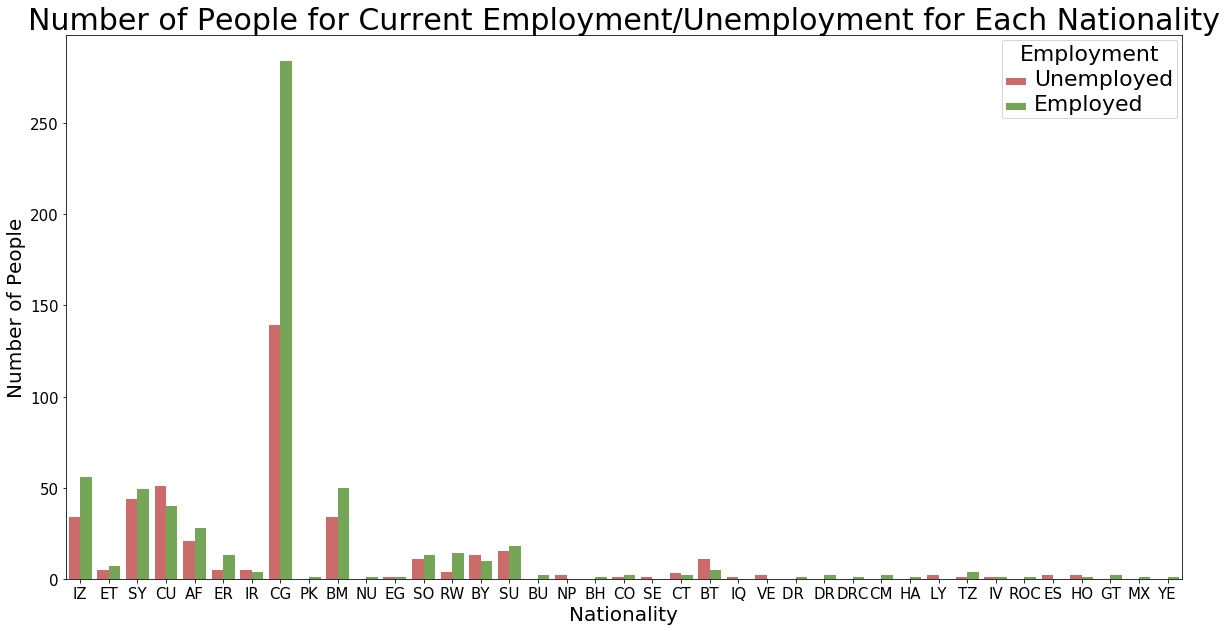

In [13]:
fig, axs = plt.subplots()
fig.set_size_inches(20, 10)
graph = sns.countplot(x="Nationality",hue='Current Employment',palette=('#db5c5a', '#71b34b'), data=df)
plt.title('Number of People for Current Employment/Unemployment for Each Nationality', fontsize=30)
graph.set_xlabel("Nationality",fontsize=20)
graph.set_ylabel("Number of People",fontsize=20)
graph.tick_params(labelsize=15)

plt.legend(loc='upper right', title='Employment')
plt.setp(graph.get_legend().get_texts(), fontsize='22') # for legend text
plt.setp(graph.get_legend().get_title(), fontsize='22') # for legend title


In [14]:
df['Nationality'].value_counts()

CG     423
SY      93
CU      91
IZ      90
BM      84
AF      49
SU      33
SO      24
BY      23
RW      18
ER      18
BT      16
ET      12
IR       9
CT       5
TZ       5
HO       3
CO       3
BU       2
GT       2
CM       2
ES       2
VE       2
NP       2
IV       2
LY       2
DR       2
EG       2
PK       1
BH       1
ROC      1
DRC      1
SE       1
YE       1
DR       1
NU       1
MX       1
HA       1
IQ       1
Name: Nationality, dtype: int64

In [88]:
x_labels = ['Washtenaw', 'Macomb', 'Ingham', 'Kalamazoo', 'Van Buren',
       'Allegan', 'Oakland', 'Genesee', 'Wayne', 'Calhoun', 'Kent',
       'Ottawa']
x_labels.sort()

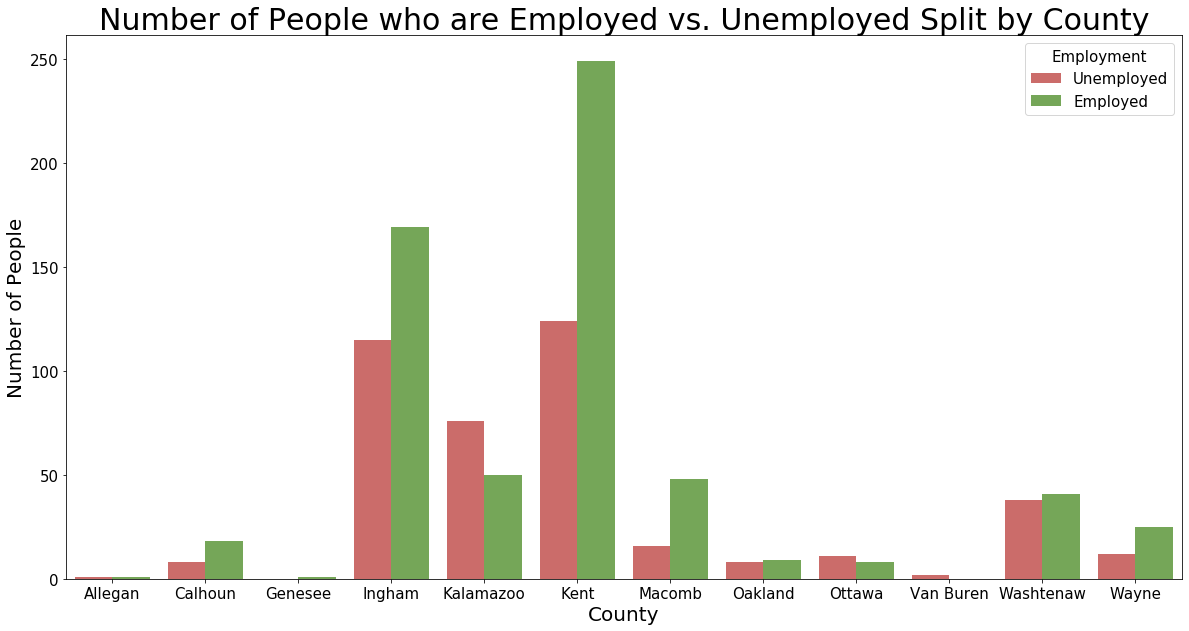

In [89]:
fig, axs = plt.subplots()
fig.set_size_inches(20, 10)
graph = sns.countplot(x="Residence County",hue='Current Employment', palette=('#db5c5a', '#71b34b'),data=df, order=x_labels)
plt.title('Number of People who are Employed vs. Unemployed Split by County', fontsize=30)

graph.set_xlabel("County",fontsize=20)
graph.set_ylabel("Number of People",fontsize=20)
graph.tick_params(labelsize=15)
graph.legend(title='Employment', title_fontsize=15, fontsize=15)

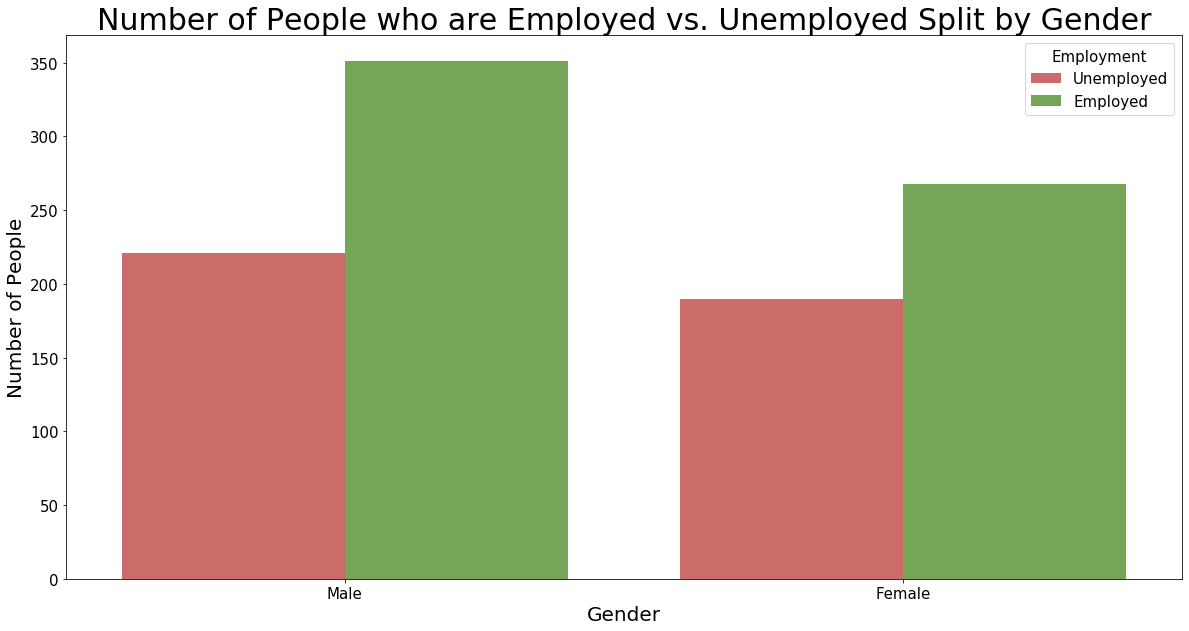

In [16]:
fig, axs = plt.subplots()
fig.set_size_inches(20, 10)
graph = sns.countplot(x="Gender",hue='Current Employment',palette=('#db5c5a', '#71b34b'), data=df)
plt.title('Number of People who are Employed vs. Unemployed Split by Gender', fontsize=30)
graph.set(ylabel='Number of People')
graph.set_xticklabels(['Male', 'Female'])

graph.set_xlabel("Gender",fontsize=20)
graph.set_ylabel("Number of People",fontsize=20)
graph.tick_params(labelsize=15)
graph.legend(title='Employment', title_fontsize=15, fontsize=15)

In [17]:
df_age = df[df['Age range for first job'] != '0-17']

In [18]:
# df_age.head(100)

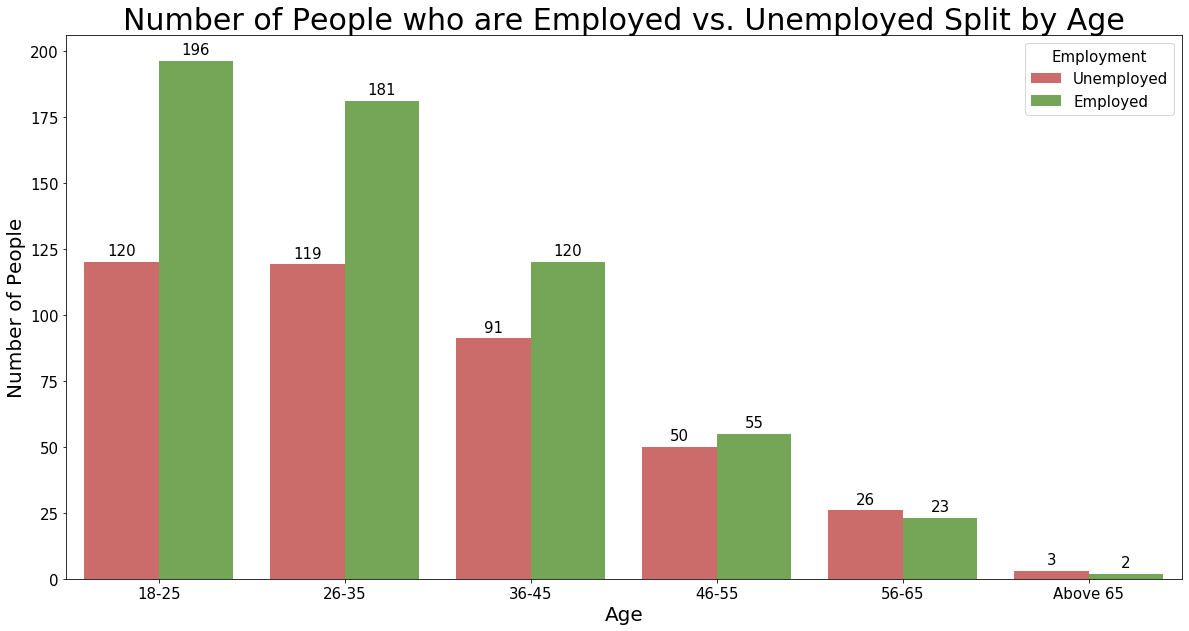

In [19]:
# it's for the first job
fig, axs = plt.subplots()
fig.set_size_inches(20, 10)
graph = sns.countplot(x="Age range for first job",hue='Current Employment', palette=('#db5c5a', '#71b34b'),
              order=['18-25', '26-35', '36-45', '46-55', '56-65', 'Above 65'], data=df_age)
plt.title('Number of People who are Employed vs. Unemployed Split by Age', fontsize=30)

graph.set_xlabel("Age",fontsize=20)
graph.set_ylabel("Number of People",fontsize=20)
graph.tick_params(labelsize=15)
graph.legend(title='Employment', title_fontsize=15, fontsize=15)

for p in graph.patches:
    height = p.get_height()
    graph.text(p.get_x()+p.get_width()/2., height + 2.5,height ,ha="center",size=15)

In [20]:
df_age['Age range for first job'].groupby(df['Current Employment']).value_counts(normalize=True)

Current Employment  Age range for first job
Employed            18-25                      0.339688
                    26-35                      0.313692
                    36-45                      0.207972
                    46-55                      0.095321
                    56-65                      0.039861
                    Above 65                   0.003466
Unemployed          18-25                      0.293399
                    26-35                      0.290954
                    36-45                      0.222494
                    46-55                      0.122249
                    56-65                      0.063570
                    Above 65                   0.007335
Name: Age range for first job, dtype: float64

In [21]:
df_prop = df_age['Age range for first job'].groupby(df['Current Employment']).value_counts(normalize=True)


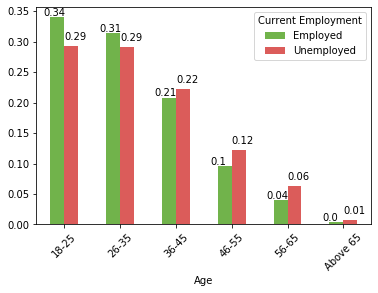

In [22]:

df_prop.unstack(0).plot(kind='bar', color=('#71b34b', '#db5c5a'))
plt.xticks(rotation=45)
plt.xlabel('Age')

x1locs = [i for i in range(0,6)]
for i, v in enumerate(df_prop.values[:6]):
    plt.text(x1locs[i]-0.38, v+0.003, str(round(v,2)))
    
# x2locs = [i for i in range(0,6)]
for i, v in enumerate(df_prop.values[6:12]):
    plt.text(x1locs[i], v+0.01, str(round(v,2)))

In [17]:
# it's for the first job
# fig, axs = plt.subplots()
# fig.set_size_inches(20, 10)
# graph = sns.barplot(x=df_prop.index,
#                     y=df_prop.values)
# #                     hue='Current Employment',
# #                     palette=('#db5c5a', '#71b34b'),
# #                     order=['18-25', '26-35', '36-45', '46-55', '56-65', 'Above 65']
# #                     data= df_prop)
# # plt.title('Number of People who are Employed vs. Unemployed Split by Age', fontsize=30)

# graph.set_xlabel("Age",fontsize=20)
# graph.set_ylabel("Number of People",fontsize=20)
# graph.tick_params(labelsize=15)
# graph.legend(title='Employment', title_fontsize=15, fontsize=15)

In [18]:
# df_employed = df[df['Employment'] == 'Employed']

In [19]:
# df_employed.sample(5)

In [20]:
receive_emp_ass = []
for index, row in df.iterrows(): 
    if row['Employability Assessment'] == 1:
        receive_emp_ass.append('Yes')
    elif row['Employability Assessment.1'] == 1:
        receive_emp_ass.append('Yes')
    elif row['Employability Assessment.2'] == 1:
        receive_emp_ass.append('Yes')
    else:
        receive_emp_ass.append('No')

In [28]:
df['Receive Employbility Assessment'] = receive_emp_ass

In [29]:
yes_emp_ass = df[df['Receive Employbility Assessment'] == 'Yes']

In [30]:
# no_emp_ass = df[df['Receive Employbility Assessment'] == 'No']

In [31]:
# emp_rate_no_emp_ass = len(no_emp_ass[no_emp_ass['Employment']=='Employed'])/len(no_emp_ass)
# emp_rate_no_emp_ass

In [32]:
emp_yes_emp_ass = len(yes_emp_ass[yes_emp_ass['Employment']=='Employed'])
emp_yes_emp_ass

490

In [33]:
unemp_yes_emp_ass = len(yes_emp_ass[yes_emp_ass['Employment']=='Unemployed'])
unemp_yes_emp_ass

200

In [34]:
receive_transp = []
for index, row in df.iterrows(): 
    if row['Transportation'] == 1:
        receive_transp.append('Yes')
    elif row['Transportation.1'] == 1:
        receive_transp.append('Yes')
    elif row['Transportation.2'] == 1:
        receive_transp.append('Yes')
    else:
        receive_transp.append('No')

In [35]:
df['Receive Transportation'] = receive_transp

In [36]:
# no_transp = df[df['Receive Transportation'] == 'No']
yes_transp = df[df['Receive Transportation'] == 'Yes']

In [37]:
# emp_rate_no_transp = len(no_transp[no_transp['Employment']=='Employed'])/len(no_transp)
# emp_rate_no_transp

In [38]:
emp_yes_transp = len(yes_transp[yes_transp['Employment']=='Employed'])
emp_yes_transp

400

In [39]:
unemp_yes_transp = len(yes_transp[yes_transp['Employment']=='Unemployed'])
unemp_yes_transp

112

In [40]:
receive_int = []
for index, row in df.iterrows(): 
    if row['Interpretation & Translation'] == 1:
        receive_int.append('Yes')
    elif row['Interpretation & Translation.1'] == 1:
        receive_int.append('Yes')
    elif row['Interpretation & Translation.2'] == 1:
        receive_int.append('Yes')
    else:
        receive_int.append('No')

In [41]:
df['Receive Interpretation & Translation'] = receive_int

In [42]:
# no_int = df[df['Receive Interpretation & Translation']=='No']
yes_int = df[df['Receive Interpretation & Translation']=='Yes']

In [43]:
# emp_rate_no_int = len(no_int[no_int['Employment']=='Employed'])/len(no_int)
# emp_rate_no_int

In [44]:
emp_yes_int = len(yes_int[yes_int['Employment']=='Employed'])
emp_yes_int

518

In [45]:
unemp_yes_int = len(yes_int[yes_int['Employment']=='Unemployed'])
unemp_yes_int

148

In [46]:
receive_ead_ass = []
for index, row in df.iterrows(): 
    if row['EAD Assistance'] == 1:
        receive_ead_ass.append('Yes')
    elif row['EAD Assistance'] == 1:
        receive_ead_ass.append('Yes')
    elif row['EAD Assistance'] == 1:
        receive_ead_ass.append('Yes')
    else:
        receive_ead_ass.append('No')

In [47]:
df['Receive EAD Assistance'] = receive_ead_ass

In [48]:
# no_ead_ass = df[df['Receive EAD Assistance']=='No']
yes_ead_ass = df[df['Receive EAD Assistance']=='Yes']

In [49]:
# emp_rate_no_ead_ass = len(no_ead_ass[no_ead_ass['Employment']=='Employed'])/len(no_ead_ass)
# emp_rate_no_ead_ass

In [50]:
emp_yes_ead_ass = len(yes_ead_ass[yes_ead_ass['Employment']=='Employed'])
emp_yes_ead_ass

5

In [51]:
unemp_yes_ead_ass = len(yes_ead_ass[yes_ead_ass['Employment']=='Unemployed'])
unemp_yes_ead_ass

4

In [52]:
services = pd.DataFrame(data={'Service':['Employbility Assessment', 'Employbility Assessment',
                                              'Transportation', 'Transportation',
                                              'Interpretation & Translation', 'Interpretation & Translation',
                                              'EAD Assistance', 'EAD Assistance'],
            'Employment': ['Employed', 'Unemployed', 'Employed', 'Unemployed',
                           'Employed', 'Unemployed', 'Employed', 'Unemployed'],
            'Number of People': [emp_yes_emp_ass, unemp_yes_emp_ass,
                                emp_yes_transp, unemp_yes_transp,
                                emp_yes_int, unemp_yes_int,
                                emp_yes_ead_ass, unemp_yes_ead_ass]})

In [53]:
services

,Service,Employment,Number of People
0,Employbility Assessment,Employed,490
1,Employbility Assessment,Unemployed,200
2,Transportation,Employed,400
3,Transportation,Unemployed,112
4,Interpretation & Translation,Employed,518
5,Interpretation & Translation,Unemployed,148
6,EAD Assistance,Employed,5
7,EAD Assistance,Unemployed,4


Text(0.5, 1.0, 'Number of People Who Use Each Service')

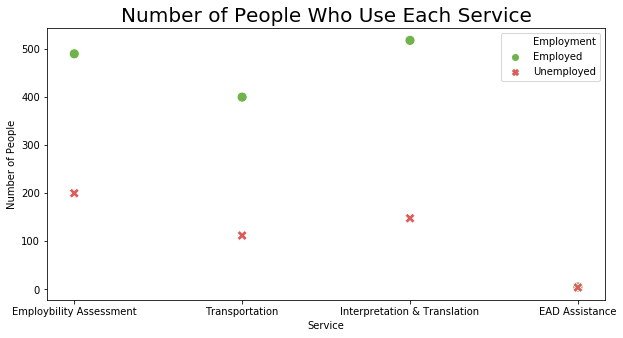

In [54]:
#See if any of the service helps them got jobs.
fig, axs = plt.subplots()
fig.set_size_inches(10, 5)
sns.scatterplot(x="Service", y="Number of People",
                s=100,
                hue='Employment',
                palette=('#71b34b', '#db5c5a'),
                style='Employment',
                data=services)
plt.title('Number of People Who Use Each Service', fontsize=20)

In [55]:
df_wage = df[df.Wage>0]

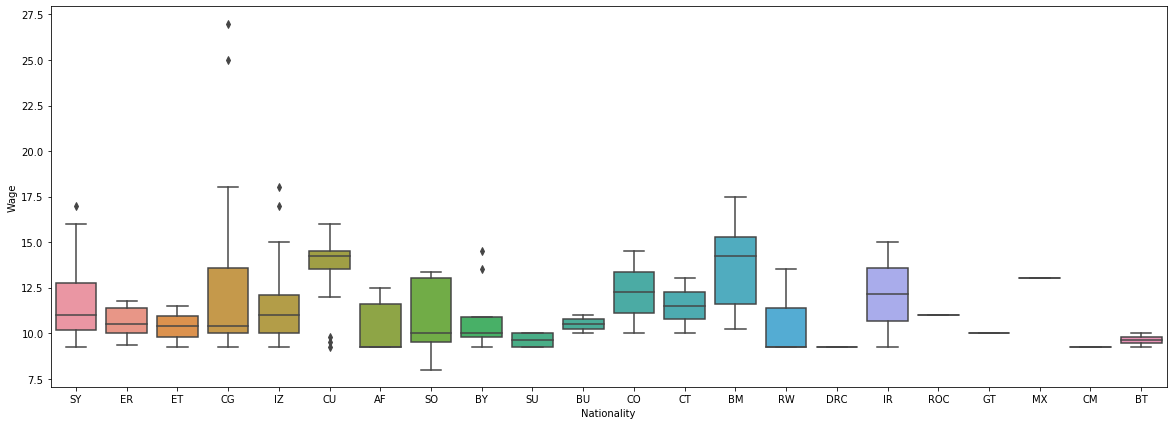

In [56]:
fig, axs = plt.subplots()
fig.set_size_inches(20, 7)
sns.boxplot(x="Nationality", y="Wage",data=df_wage)   

[Text(0, 0, 'Male'), Text(0, 0, 'Female')]

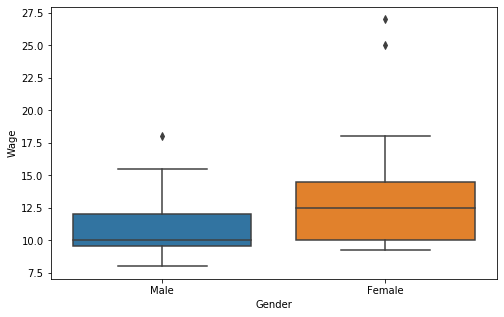

In [57]:
fig, axs = plt.subplots()
fig.set_size_inches(8, 5)
graph = sns.boxplot(x="Gender", y="Wage",data=df_wage) 
graph.set_xticklabels(['Male', 'Female'])

In [58]:
df_has_job = df[df['Days from enrollment to first job']<0]
df_has_job.sample(5)

,Numbered,Agency Case Number (Optional),Agency Case Status (Optional),Residence County,Enrollment Date,Enrollment End Date,USCIS Status,Secondary Migrant (Migrated In),Migrated Out of State,State Migrated In or Out,Gender,Nationality,Date of Birth,Date of Entry in the U.S.,Match Grant Begin Date,Match Grant End Date,College Degree,Professional Certificate,Field of Study,Time Limited Food Assistance Client,Method of Referral,Received Employment Sevices,New Case,Follow-Up,Referred,0-30 Days,Longer than 1 Month,Longer Than 3 Months,Completed Training,Beginner,Intermediate,Other,Employability Assessment,Transportation,Interpretation & Translation,EAD Assistance,Employment Begin Date,Full Time or Part Time,Cash Assistance Type at Time of Employment,Wage,Medical Benefits Available Employer,Cash Assistance Status after Placement,Second Employment Begin Date,Full Time or Part Time.1,Cash Assistance Type at Time of Employment.1,Wage.1,Medical Benefits from Employer,Cash Assistance Status after Placement.1,Job Upgrade,Total Number of Job Placements in Trimester,Employment Date from a Previous Trimester or Prior to Enrollment,Previous Employment Lasted Until 1/31/2019,Cash on the Last Day of the Current Trimester,Job Placement 90 Day Retention,Were on RCA & Reached 8 Month Time Limit,Age,Time in the U.S.,Date of Entry to Date of Employment,Days in the U.S.,Last Day of the Trimester,Received Employment Sevices.1,New Case.1,Follow-Up.1,Referred.1,0-30 days,Longer than 1 Month.1,Longer than 3 Months,Completed Training.1,Beginner.1,Intermediate.1,Other .1,Employability Assessment.1,Transportation.1,Interpretation & Translation.1,EAD Assistance.1,Employment Begin Date.1,Full Time or Part Time.2,Cash Assistance Type at Time of Employment.2,Wage.2,Medical Benefits Available from Employer,Cash Assistance Status after Placement.2,Second Employment Begin Date.1,Full Time or Part Time.3,Cash Assistance Type at Time of Employment.3,Wage.3,Medical Benefits Available from Employer.1,Cash Assistance Status after Placement.3,Job Upgrade.1,Total Number of Job Placements in Trimester.1,Employment Date from a Previous Trimester or Prior to Enrollment.1,Previous Employment Lasted Until 5/31/2019,Cash on the Last Day of the Current Trimester.1,Job Placement 90 Day Retention.1,Were on RCA & Reached 8 Month Time Limit .1,Age.1,Time in the U.S..1,Date of Entry to Date of Employment.1,Days in the U.S..1,Last Day of the Trimester.1,Received Employment Sevices.2,New Case.2,Follow-Up.2,Referred.2,0-30 days.1,Longer than 1 Month.2,Longer than 3 Months.1,Completed Training.2,Beginner.2,Intermediate.2,Other,Employability Assessment.2,Transportation.2,Interpretation & Translation.2,EAD Assistance.2,Employment Begin Date.2,Full Time or Part Time.4,Cash Assistance Type at Time of Employment.4,Wage.4,Medical Benefits Available from Employer.2,Cash Assistance Status after Placement.4,Second Employment Begin Date.2,Full Time or Part Time.5,Cash Assistance Type at Time of Employment.5,Wage.5,Medical Benefits Available from Employer.3,Cash Assistance Status after Placement.5,Job Upgrade.2,Total Number of Job Placements in Trimester.2,Employment Date from a Previous Trimester or Prior to Enrollment.2,Previous Employment Lasted Until 9/30/2019,Cash on the Last Day of the Current Trimester.2,Job Placement 90 Day Retention.2,Were on RCA & Reached 8 Month Time Limit .2,Age.2,Time in the U.S..2,Date of Entry to Date of Employment.2,Days in the U.S..2,Last Day of the Trimester.2,Agency,Unnamed: 128,Current Employment,Employment,Days from enrollment to first job,Age first job,Age range for first job,Receive Employbility Assessment,Receive Transportation,Receive Interpretation & Translation,Receive EAD Assistance
1779,2019-09-11 00:00:00,0,Open,Kent,2019-09-03 00:00:00,0,1,0,0,0,F,SY,1975-01-01 00:00:00,2015-08-12 00:00:00,0,0,0,0,0,0.0,Other BCS program,1,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0.0,0,0.00,0.0,0.0,0,0.0,0,0.0,0.0,0.0,0,0.0,2018-09-01 00:00:00,Yes,N,0.0,0.0,44,41,0.000000,1268.0

In [59]:
df_has_job[df_has_job['Completed Training.2'] == 1]

,Numbered,Agency Case Number (Optional),Agency Case Status (Optional),Residence County,Enrollment Date,Enrollment End Date,USCIS Status,Secondary Migrant (Migrated In),Migrated Out of State,State Migrated In or Out,Gender,Nationality,Date of Birth,Date of Entry in the U.S.,Match Grant Begin Date,Match Grant End Date,College Degree,Professional Certificate,Field of Study,Time Limited Food Assistance Client,Method of Referral,Received Employment Sevices,New Case,Follow-Up,Referred,0-30 Days,Longer than 1 Month,Longer Than 3 Months,Completed Training,Beginner,Intermediate,Other,Employability Assessment,Transportation,Interpretation & Translation,EAD Assistance,Employment Begin Date,Full Time or Part Time,Cash Assistance Type at Time of Employment,Wage,Medical Benefits Available Employer,Cash Assistance Status after Placement,Second Employment Begin Date,Full Time or Part Time.1,Cash Assistance Type at Time of Employment.1,Wage.1,Medical Benefits from Employer,Cash Assistance Status after Placement.1,Job Upgrade,Total Number of Job Placements in Trimester,Employment Date from a Previous Trimester or Prior to Enrollment,Previous Employment Lasted Until 1/31/2019,Cash on the Last Day of the Current Trimester,Job Placement 90 Day Retention,Were on RCA & Reached 8 Month Time Limit,Age,Time in the U.S.,Date of Entry to Date of Employment,Days in the U.S.,Last Day of the Trimester,Received Employment Sevices.1,New Case.1,Follow-Up.1,Referred.1,0-30 days,Longer than 1 Month.1,Longer than 3 Months,Completed Training.1,Beginner.1,Intermediate.1,Other .1,Employability Assessment.1,Transportation.1,Interpretation & Translation.1,EAD Assistance.1,Employment Begin Date.1,Full Time or Part Time.2,Cash Assistance Type at Time of Employment.2,Wage.2,Medical Benefits Available from Employer,Cash Assistance Status after Placement.2,Second Employment Begin Date.1,Full Time or Part Time.3,Cash Assistance Type at Time of Employment.3,Wage.3,Medical Benefits Available from Employer.1,Cash Assistance Status after Placement.3,Job Upgrade.1,Total Number of Job Placements in Trimester.1,Employment Date from a Previous Trimester or Prior to Enrollment.1,Previous Employment Lasted Until 5/31/2019,Cash on the Last Day of the Current Trimester.1,Job Placement 90 Day Retention.1,Were on RCA & Reached 8 Month Time Limit .1,Age.1,Time in the U.S..1,Date of Entry to Date of Employment.1,Days in the U.S..1,Last Day of the Trimester.1,Received Employment Sevices.2,New Case.2,Follow-Up.2,Referred.2,0-30 days.1,Longer than 1 Month.2,Longer than 3 Months.1,Completed Training.2,Beginner.2,Intermediate.2,Other,Employability Assessment.2,Transportation.2,Interpretation & Translation.2,EAD Assistance.2,Employment Begin Date.2,Full Time or Part Time.4,Cash Assistance Type at Time of Employment.4,Wage.4,Medical Benefits Available from Employer.2,Cash Assistance Status after Placement.4,Second Employment Begin Date.2,Full Time or Part Time.5,Cash Assistance Type at Time of Employment.5,Wage.5,Medical Benefits Available from Employer.3,Cash Assistance Status after Placement.5,Job Upgrade.2,Total Number of Job Placements in Trimester.2,Employment Date from a Previous Trimester or Prior to Enrollment.2,Previous Employment Lasted Until 9/30/2019,Cash on the Last Day of the Current Trimester.2,Job Placement 90 Day Retention.2,Were on RCA & Reached 8 Month Time Limit .2,Age.2,Time in the U.S..2,Date of Entry to Date of Employment.2,Days in the U.S..2,Last Day of the Trimester.2,Agency,Unnamed: 128,Current Employment,Employment,Days from enrollment to first job,Age first job,Age range for first job,Receive Employbility Assessment,Receive Transportation,Receive Interpretation & Translation,Receive EAD Assistance


In [60]:
# df['Employment Begin Date']-df['Enrollment Date']
# for the current job

enroll_to_current_job=[]
age_current_job=[]
age_label_current_job=[]
for index, row in df.iterrows(): 
    if row['Employment Begin Date.2'] != 0:
        enroll_to_current_job.append((row['Employment Begin Date.2']-row['Enrollment Date']).days)
        age_current_job.append(row['Age.2'])
    elif row['Employment Begin Date.1'] != 0:
        enroll_to_current_job.append((row['Employment Begin Date.1']-row['Enrollment Date']).days)
        age_current_job.append(row['Age.1'])
    elif row['Employment Begin Date'] != 0:
        enroll_to_current_job.append((row['Employment Begin Date']-row['Enrollment Date']).days)
        age_current_job.append(row['Age'])
    else:
        enroll_to_current_job.append(None)
        age_current_job.append(row['Age.2'])
        
for age in age_current_job:
    if age<18:
        age_label_current_job.append('0-17')
    elif age<26:
        age_label_current_job.append('18-25')
    elif age<36:
        age_label_current_job.append('26-35')
    elif age<46:
        age_label_current_job.append('36-45')
    elif age<56:
        age_label_current_job.append('46-55')
    elif age<66:
        age_label_current_job.append('56-65')
    elif age>65:
        age_label_current_job.append('Above 65')
    else:
        age_label_current_job.append(None)

# print(enroll_to_current_job)

In [61]:
df['Days from enrollment to current job'] = enroll_to_current_job
df['Age current job'] = age_current_job
df['Age range for current job'] = age_label_current_job
df.sample(5)

,Numbered,Agency Case Number (Optional),Agency Case Status (Optional),Residence County,Enrollment Date,Enrollment End Date,USCIS Status,Secondary Migrant (Migrated In),Migrated Out of State,State Migrated In or Out,Gender,Nationality,Date of Birth,Date of Entry in the U.S.,Match Grant Begin Date,Match Grant End Date,College Degree,Professional Certificate,Field of Study,Time Limited Food Assistance Client,Method of Referral,Received Employment Sevices,New Case,Follow-Up,Referred,0-30 Days,Longer than 1 Month,Longer Than 3 Months,Completed Training,Beginner,Intermediate,Other,Employability Assessment,Transportation,Interpretation & Translation,EAD Assistance,Employment Begin Date,Full Time or Part Time,Cash Assistance Type at Time of Employment,Wage,Medical Benefits Available Employer,Cash Assistance Status after Placement,Second Employment Begin Date,Full Time or Part Time.1,Cash Assistance Type at Time of Employment.1,Wage.1,Medical Benefits from Employer,Cash Assistance Status after Placement.1,Job Upgrade,Total Number of Job Placements in Trimester,Employment Date from a Previous Trimester or Prior to Enrollment,Previous Employment Lasted Until 1/31/2019,Cash on the Last Day of the Current Trimester,Job Placement 90 Day Retention,Were on RCA & Reached 8 Month Time Limit,Age,Time in the U.S.,Date of Entry to Date of Employment,Days in the U.S.,Last Day of the Trimester,Received Employment Sevices.1,New Case.1,Follow-Up.1,Referred.1,0-30 days,Longer than 1 Month.1,Longer than 3 Months,Completed Training.1,Beginner.1,Intermediate.1,Other .1,Employability Assessment.1,Transportation.1,Interpretation & Translation.1,EAD Assistance.1,Employment Begin Date.1,Full Time or Part Time.2,Cash Assistance Type at Time of Employment.2,Wage.2,Medical Benefits Available from Employer,Cash Assistance Status after Placement.2,Second Employment Begin Date.1,Full Time or Part Time.3,Cash Assistance Type at Time of Employment.3,Wage.3,Medical Benefits Available from Employer.1,Cash Assistance Status after Placement.3,Job Upgrade.1,Total Number of Job Placements in Trimester.1,Employment Date from a Previous Trimester or Prior to Enrollment.1,Previous Employment Lasted Until 5/31/2019,Cash on the Last Day of the Current Trimester.1,Job Placement 90 Day Retention.1,Were on RCA & Reached 8 Month Time Limit .1,Age.1,Time in the U.S..1,Date of Entry to Date of Employment.1,Days in the U.S..1,Last Day of the Trimester.1,Received Employment Sevices.2,New Case.2,Follow-Up.2,Referred.2,0-30 days.1,Longer than 1 Month.2,Longer than 3 Months.1,Completed Training.2,Beginner.2,Intermediate.2,Other,Employability Assessment.2,Transportation.2,Interpretation & Translation.2,EAD Assistance.2,Employment Begin Date.2,Full Time or Part Time.4,Cash Assistance Type at Time of Employment.4,Wage.4,Medical Benefits Available from Employer.2,Cash Assistance Status after Placement.4,Second Employment Begin Date.2,Full Time or Part Time.5,Cash Assistance Type at Time of Employment.5,Wage.5,Medical Benefits Available from Employer.3,Cash Assistance Status after Placement.5,Job Upgrade.2,Total Number of Job Placements in Trimester.2,Employment Date from a Previous Trimester or Prior to Enrollment.2,Previous Employment Lasted Until 9/30/2019,Cash on the Last Day of the Current Trimester.2,Job Placement 90 Day Retention.2,Were on RCA & Reached 8 Month Time Limit .2,Age.2,Time in the U.S..2,Date of Entry to Date of Employment.2,Days in the U.S..2,Last Day of the Trimester.2,Agency,Unnamed: 128,Current Employment,Employment,Days from enrollment to first job,Age first job,Age range for first job,Receive Employbility Assessment,Receive Transportation,Receive Interpretation & Translation,Receive EAD Assistance,Days from enrollment to current job,Age current job,Age range for current job
1962,0,0,Closed,Kent,2018-07-27 00:00:00,2019-03-28 00:00:00,1,1,0,TX,M,CG,1971-01-01 00:00:00,2017-09-19 00:00:00,0,0,0,0,0,0.0,Walk-In,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0,0.0,0.0,0.0,0,0.0,0,0.0

Text(0.5, 1.0, 'Days from Enrollment to First Job vs. Nationality')

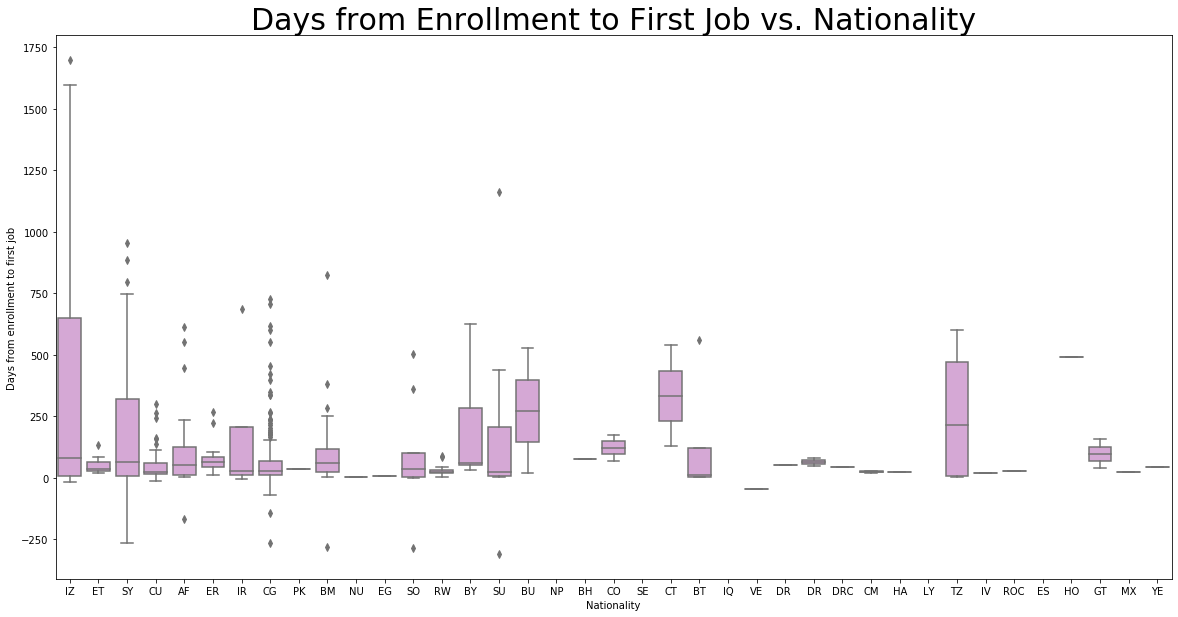

In [62]:
fig, axs = plt.subplots()
fig.set_size_inches(20, 10)
sns.boxplot(x="Nationality", y="Days from enrollment to first job",data=df, color='plum')
plt.title('Days from Enrollment to First Job vs. Nationality', fontsize=30)

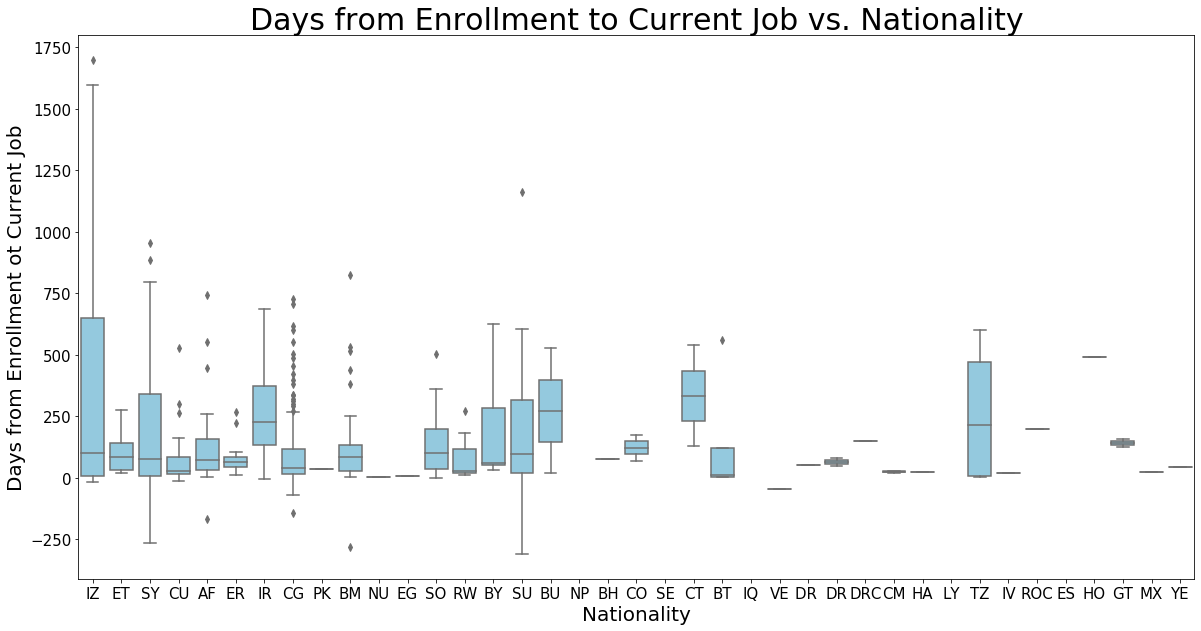

In [63]:
fig, axs = plt.subplots()
fig.set_size_inches(20, 10)
graph = sns.boxplot(x="Nationality", y="Days from enrollment to current job",data=df, color='skyblue') 
plt.title('Days from Enrollment to Current Job vs. Nationality', fontsize=30)
graph.set_xlabel("Nationality",fontsize=20)
graph.set_ylabel("Days from Enrollment ot Current Job",fontsize=20)
graph.tick_params(labelsize=15)

In [64]:
df.sort_values(by='Days from enrollment to current job', ascending=False).head(10)

,Numbered,Agency Case Number (Optional),Agency Case Status (Optional),Residence County,Enrollment Date,Enrollment End Date,USCIS Status,Secondary Migrant (Migrated In),Migrated Out of State,State Migrated In or Out,Gender,Nationality,Date of Birth,Date of Entry in the U.S.,Match Grant Begin Date,Match Grant End Date,College Degree,Professional Certificate,Field of Study,Time Limited Food Assistance Client,Method of Referral,Received Employment Sevices,New Case,Follow-Up,Referred,0-30 Days,Longer than 1 Month,Longer Than 3 Months,Completed Training,Beginner,Intermediate,Other,Employability Assessment,Transportation,Interpretation & Translation,EAD Assistance,Employment Begin Date,Full Time or Part Time,Cash Assistance Type at Time of Employment,Wage,Medical Benefits Available Employer,Cash Assistance Status after Placement,Second Employment Begin Date,Full Time or Part Time.1,Cash Assistance Type at Time of Employment.1,Wage.1,Medical Benefits from Employer,Cash Assistance Status after Placement.1,Job Upgrade,Total Number of Job Placements in Trimester,Employment Date from a Previous Trimester or Prior to Enrollment,Previous Employment Lasted Until 1/31/2019,Cash on the Last Day of the Current Trimester,Job Placement 90 Day Retention,Were on RCA & Reached 8 Month Time Limit,Age,Time in the U.S.,Date of Entry to Date of Employment,Days in the U.S.,Last Day of the Trimester,Received Employment Sevices.1,New Case.1,Follow-Up.1,Referred.1,0-30 days,Longer than 1 Month.1,Longer than 3 Months,Completed Training.1,Beginner.1,Intermediate.1,Other .1,Employability Assessment.1,Transportation.1,Interpretation & Translation.1,EAD Assistance.1,Employment Begin Date.1,Full Time or Part Time.2,Cash Assistance Type at Time of Employment.2,Wage.2,Medical Benefits Available from Employer,Cash Assistance Status after Placement.2,Second Employment Begin Date.1,Full Time or Part Time.3,Cash Assistance Type at Time of Employment.3,Wage.3,Medical Benefits Available from Employer.1,Cash Assistance Status after Placement.3,Job Upgrade.1,Total Number of Job Placements in Trimester.1,Employment Date from a Previous Trimester or Prior to Enrollment.1,Previous Employment Lasted Until 5/31/2019,Cash on the Last Day of the Current Trimester.1,Job Placement 90 Day Retention.1,Were on RCA & Reached 8 Month Time Limit .1,Age.1,Time in the U.S..1,Date of Entry to Date of Employment.1,Days in the U.S..1,Last Day of the Trimester.1,Received Employment Sevices.2,New Case.2,Follow-Up.2,Referred.2,0-30 days.1,Longer than 1 Month.2,Longer than 3 Months.1,Completed Training.2,Beginner.2,Intermediate.2,Other,Employability Assessment.2,Transportation.2,Interpretation & Translation.2,EAD Assistance.2,Employment Begin Date.2,Full Time or Part Time.4,Cash Assistance Type at Time of Employment.4,Wage.4,Medical Benefits Available from Employer.2,Cash Assistance Status after Placement.4,Second Employment Begin Date.2,Full Time or Part Time.5,Cash Assistance Type at Time of Employment.5,Wage.5,Medical Benefits Available from Employer.3,Cash Assistance Status after Placement.5,Job Upgrade.2,Total Number of Job Placements in Trimester.2,Employment Date from a Previous Trimester or Prior to Enrollment.2,Previous Employment Lasted Until 9/30/2019,Cash on the Last Day of the Current Trimester.2,Job Placement 90 Day Retention.2,Were on RCA & Reached 8 Month Time Limit .2,Age.2,Time in the U.S..2,Date of Entry to Date of Employment.2,Days in the U.S..2,Last Day of the Trimester.2,Agency,Unnamed: 128,Current Employment,Employment,Days from enrollment to first job,Age first job,Age range for first job,Receive Employbility Assessment,Receive Transportation,Receive Interpretation & Translation,Receive EAD Assistance,Days from enrollment to current job,Age current job,Age range for current job
82,30,"Youanes, Marina",0,Macomb,2014-07-07 00:00:00,0,1,0,0,0,F,IZ,1987-03-07 00:00:00,2014-06-19 00:00:00,0,0,0,0,0,0.0,Walk-In,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0,0.0,0.0,0.0,0,0.0,0,0.0,0.0,0.

In [65]:
x_labels = ['Washtenaw', 'Macomb', 'Ingham', 'Kalamazoo', 'Van Buren',
       'Allegan', 'Oakland', 'Genesee', 'Wayne', 'Calhoun', 'Kent',
       'Ottawa']
x_labels.sort()

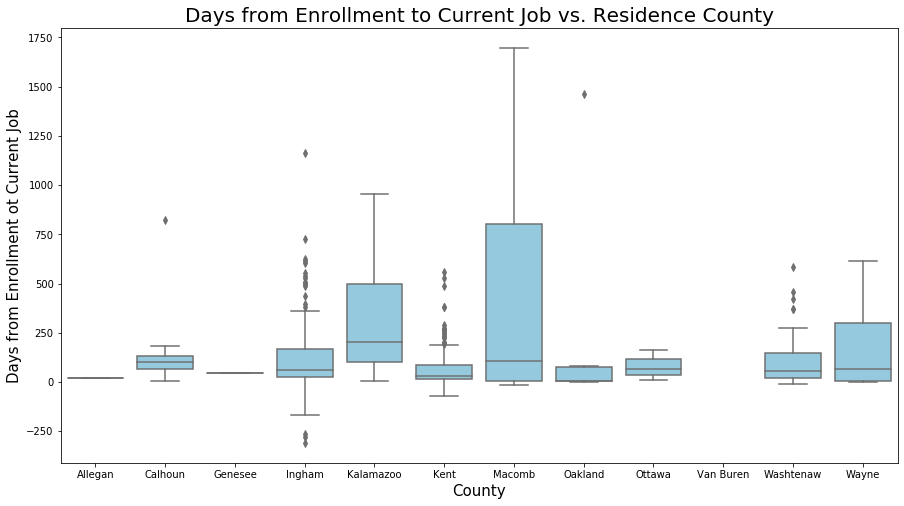

In [66]:
fig, axs = plt.subplots()
fig.set_size_inches(15, 8)
graph = sns.boxplot(x="Residence County", y="Days from enrollment to current job",data=df, order=x_labels, color='skyblue') 
plt.title('Days from Enrollment to Current Job vs. Residence County', fontsize=20)
graph.set_xlabel("County",fontsize=15)
graph.set_ylabel("Days from Enrollment ot Current Job",fontsize=15)
graph.tick_params(labelsize=10)

Text(0.5, 1.0, 'Days from Enrollment to First Job vs. Residence County')

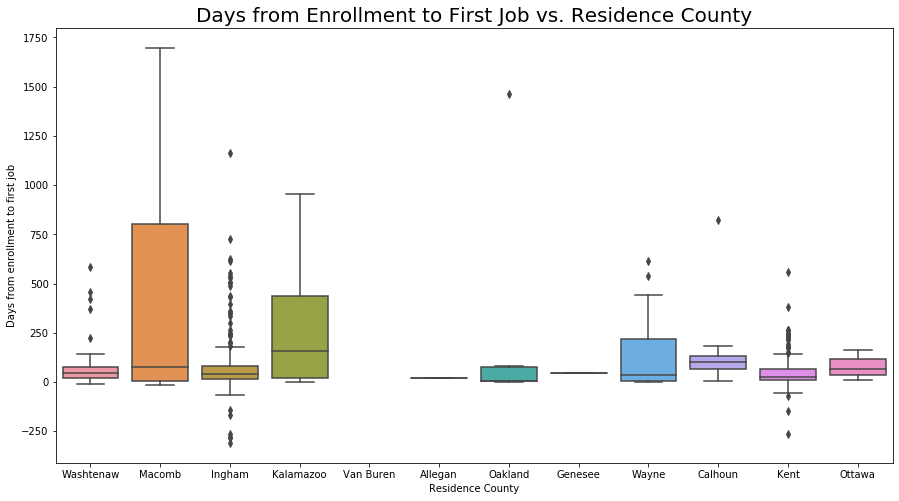

In [67]:
fig, axs = plt.subplots()
fig.set_size_inches(15, 8)
sns.boxplot(x="Residence County", y="Days from enrollment to first job",data=df) 
plt.title('Days from Enrollment to First Job vs. Residence County', fontsize=20)

Text(0, 0.5, 'Days from Enrollment ot Current Job')

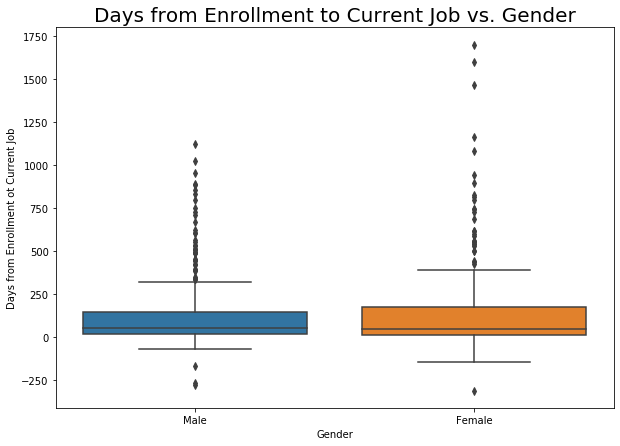

In [68]:
fig, axs = plt.subplots()
fig.set_size_inches(10, 7)
graph = sns.boxplot(x="Gender", y="Days from enrollment to current job",data=df) 
plt.title('Days from Enrollment to Current Job vs. Gender', fontsize=20)
graph.set_xticklabels(['Male', 'Female'])
graph.set_ylabel("Days from Enrollment ot Current Job")


[Text(0, 0, 'Male'), Text(0, 0, 'Female')]

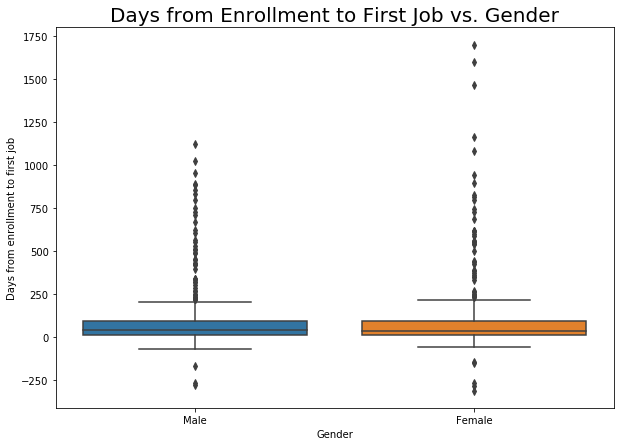

In [69]:
fig, axs = plt.subplots()
fig.set_size_inches(10, 7)
graph = sns.boxplot(x="Gender", y="Days from enrollment to first job",data=df) 
plt.title('Days from Enrollment to First Job vs. Gender', fontsize=20)
graph.set_xticklabels(['Male', 'Female'])

In [70]:
df_age = df[(df['Days from enrollment to first job']>0) & (df['Age range for first job']!='0-17')]

In [71]:
df_age

,Numbered,Agency Case Number (Optional),Agency Case Status (Optional),Residence County,Enrollment Date,Enrollment End Date,USCIS Status,Secondary Migrant (Migrated In),Migrated Out of State,State Migrated In or Out,Gender,Nationality,Date of Birth,Date of Entry in the U.S.,Match Grant Begin Date,Match Grant End Date,College Degree,Professional Certificate,Field of Study,Time Limited Food Assistance Client,Method of Referral,Received Employment Sevices,New Case,Follow-Up,Referred,0-30 Days,Longer than 1 Month,Longer Than 3 Months,Completed Training,Beginner,Intermediate,Other,Employability Assessment,Transportation,Interpretation & Translation,EAD Assistance,Employment Begin Date,Full Time or Part Time,Cash Assistance Type at Time of Employment,Wage,Medical Benefits Available Employer,Cash Assistance Status after Placement,Second Employment Begin Date,Full Time or Part Time.1,Cash Assistance Type at Time of Employment.1,Wage.1,Medical Benefits from Employer,Cash Assistance Status after Placement.1,Job Upgrade,Total Number of Job Placements in Trimester,Employment Date from a Previous Trimester or Prior to Enrollment,Previous Employment Lasted Until 1/31/2019,Cash on the Last Day of the Current Trimester,Job Placement 90 Day Retention,Were on RCA & Reached 8 Month Time Limit,Age,Time in the U.S.,Date of Entry to Date of Employment,Days in the U.S.,Last Day of the Trimester,Received Employment Sevices.1,New Case.1,Follow-Up.1,Referred.1,0-30 days,Longer than 1 Month.1,Longer than 3 Months,Completed Training.1,Beginner.1,Intermediate.1,Other .1,Employability Assessment.1,Transportation.1,Interpretation & Translation.1,EAD Assistance.1,Employment Begin Date.1,Full Time or Part Time.2,Cash Assistance Type at Time of Employment.2,Wage.2,Medical Benefits Available from Employer,Cash Assistance Status after Placement.2,Second Employment Begin Date.1,Full Time or Part Time.3,Cash Assistance Type at Time of Employment.3,Wage.3,Medical Benefits Available from Employer.1,Cash Assistance Status after Placement.3,Job Upgrade.1,Total Number of Job Placements in Trimester.1,Employment Date from a Previous Trimester or Prior to Enrollment.1,Previous Employment Lasted Until 5/31/2019,Cash on the Last Day of the Current Trimester.1,Job Placement 90 Day Retention.1,Were on RCA & Reached 8 Month Time Limit .1,Age.1,Time in the U.S..1,Date of Entry to Date of Employment.1,Days in the U.S..1,Last Day of the Trimester.1,Received Employment Sevices.2,New Case.2,Follow-Up.2,Referred.2,0-30 days.1,Longer than 1 Month.2,Longer than 3 Months.1,Completed Training.2,Beginner.2,Intermediate.2,Other,Employability Assessment.2,Transportation.2,Interpretation & Translation.2,EAD Assistance.2,Employment Begin Date.2,Full Time or Part Time.4,Cash Assistance Type at Time of Employment.4,Wage.4,Medical Benefits Available from Employer.2,Cash Assistance Status after Placement.4,Second Employment Begin Date.2,Full Time or Part Time.5,Cash Assistance Type at Time of Employment.5,Wage.5,Medical Benefits Available from Employer.3,Cash Assistance Status after Placement.5,Job Upgrade.2,Total Number of Job Placements in Trimester.2,Employment Date from a Previous Trimester or Prior to Enrollment.2,Previous Employment Lasted Until 9/30/2019,Cash on the Last Day of the Current Trimester.2,Job Placement 90 Day Retention.2,Were on RCA & Reached 8 Month Time Limit .2,Age.2,Time in the U.S..2,Date of Entry to Date of Employment.2,Days in the U.S..2,Last Day of the Trimester.2,Agency,Unnamed: 128,Current Employment,Employment,Days from enrollment to first job,Age first job,Age range for first job,Receive Employbility Assessment,Receive Transportation,Receive Interpretation & Translation,Receive EAD Assistance,Days from enrollment to current job,Age current job,Age range for current job
2,0,0,Open,Washtenaw,2019-06-26 00:00:00,0,1,0,0,0,M,SY,1998-09-05 00:00:00,2016-06-28 00:00:00,0,0,0,0,0,0.0,Walk in,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0,0.0,0.0,0.0,0,0.0,0,0.0,0.0,0.0,0,0.0,0,0,

In [72]:
df_age['Age range for current job'].value_counts()

18-25       190
26-35       168
36-45       110
46-55        51
56-65        24
Above 65      2
Name: Age range for current job, dtype: int64

Text(0.5, 1.0, 'Days from Enrollment to First Job vs. Age')

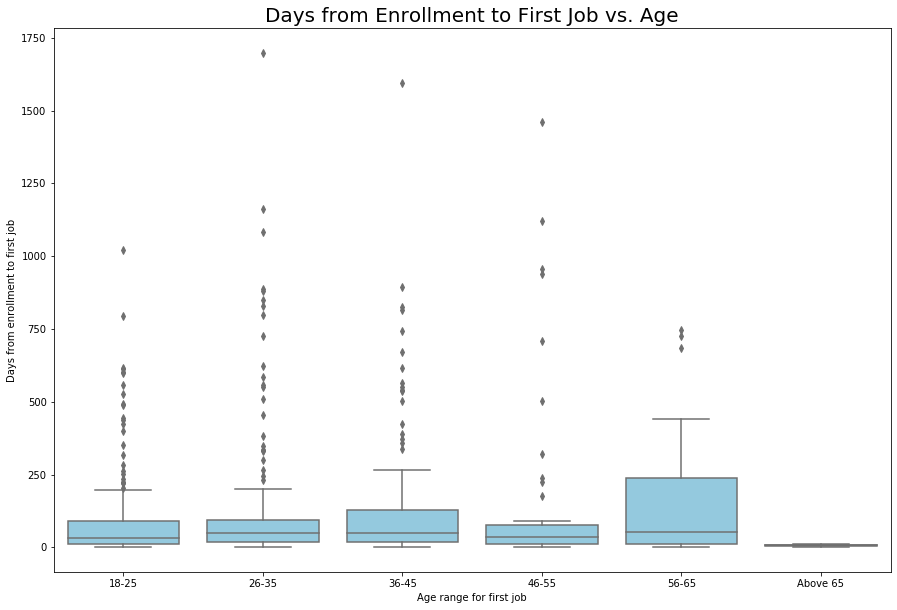

In [73]:
fig, axs = plt.subplots()
fig.set_size_inches(15, 10)
sns.boxplot(x="Age range for first job", y="Days from enrollment to first job",
            order=['18-25', '26-35', '36-45', '46-55', '56-65', 'Above 65'], color="skyblue",
            data=df_age) 
plt.title('Days from Enrollment to First Job vs. Age', fontsize=20)


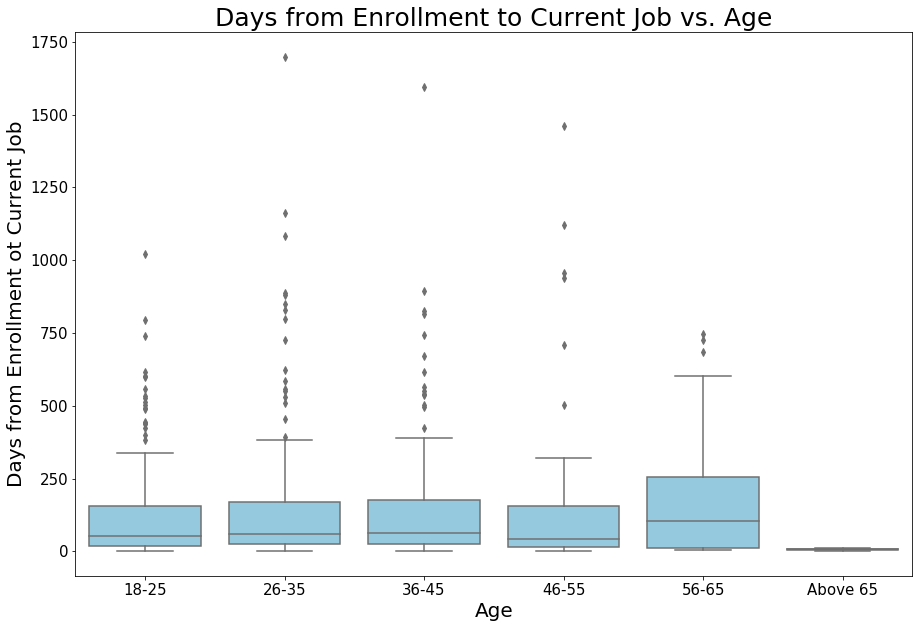

In [74]:
fig, axs = plt.subplots()
fig.set_size_inches(15, 10)
graph = sns.boxplot(x="Age range for current job", y="Days from enrollment to current job",
                    order=['18-25', '26-35', '36-45', '46-55', '56-65', 'Above 65'], color="skyblue",
                    data=df_age) 
plt.title('Days from Enrollment to Current Job vs. Age', fontsize=25)
graph.set_xlabel("Age",fontsize=20)
graph.set_ylabel("Days from Enrollment ot Current Job",fontsize=20)
graph.tick_params(labelsize=15)

In [75]:
df['Residence County'].unique()

array(['Washtenaw', 'Macomb', 'Ingham', 'Kalamazoo', 'Van Buren',
       'Allegan', 'Oakland', 'Genesee', 'Wayne', 'Calhoun', 'Kent',
       'Ottawa'], dtype=object)

In [76]:
palette ={"Washtenaw":"#20639B","Macomb":"#173F5F","Ingham":"#3CAEA3",
          "Kalamazoo":"#F6D55C", "Wayne":"#843B62", "Kent":"#ED553B",
          "Calhoun":"#FFB997", "Ottawa":"#F67E7D", "Allegan":"#165BAA",
          "Van Buren":"red", "Oakland":"green", "Genesee":"yellow"}
x_labels = ['Washtenaw', 'Macomb', 'Ingham', 'Kalamazoo', 'Van Buren',
       'Allegan', 'Oakland', 'Genesee', 'Wayne', 'Calhoun', 'Kent',
       'Ottawa']
x_labels.sort()

In [77]:
colors = list(map(palette.get, x_labels))
colors

['#165BAA',
 '#FFB997',
 'yellow',
 '#3CAEA3',
 '#F6D55C',
 '#ED553B',
 '#173F5F',
 'green',
 '#F67E7D',
 'red',
 '#20639B',
 '#843B62']

/Users/JINGCAO/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:17: DeprecationWarning: Numeric-style type codes are deprecated and will result in an error in the future.
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


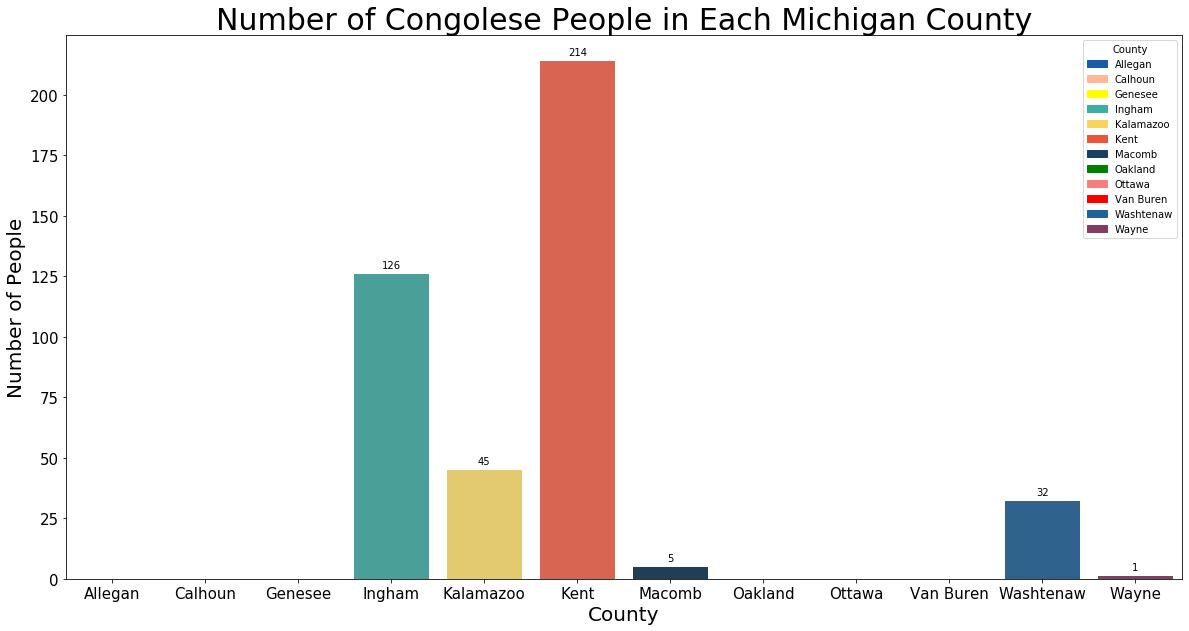

In [78]:
import matplotlib.patches as mpatches
df_cg = df[df['Nationality']=='CG']

fig, axs = plt.subplots()
fig.set_size_inches(20, 10)
graph = sns.countplot(x="Residence County", data=df_cg, order=x_labels, palette=colors)
plt.title('Number of Congolese People in Each Michigan County', fontsize=30)
graph.set_xlabel("County",fontsize=20)
graph.set_ylabel("Number of People",fontsize=20)
graph.tick_params(labelsize=15)

pat = [mpatches.Patch(color=col, label=lab) for col, lab in zip(colors, x_labels)]
axs.legend(title='County', handles=pat, bbox_to_anchor = (1,1), loc='upper right')

for p in graph.patches:
    height = p.get_height()
    graph.text(p.get_x()+p.get_width()/2, height + 2.5, height.astype('Int32')  ,ha="center")

/Users/JINGCAO/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: DeprecationWarning: Numeric-style type codes are deprecated and will result in an error in the future.
  app.launch_new_instance()
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


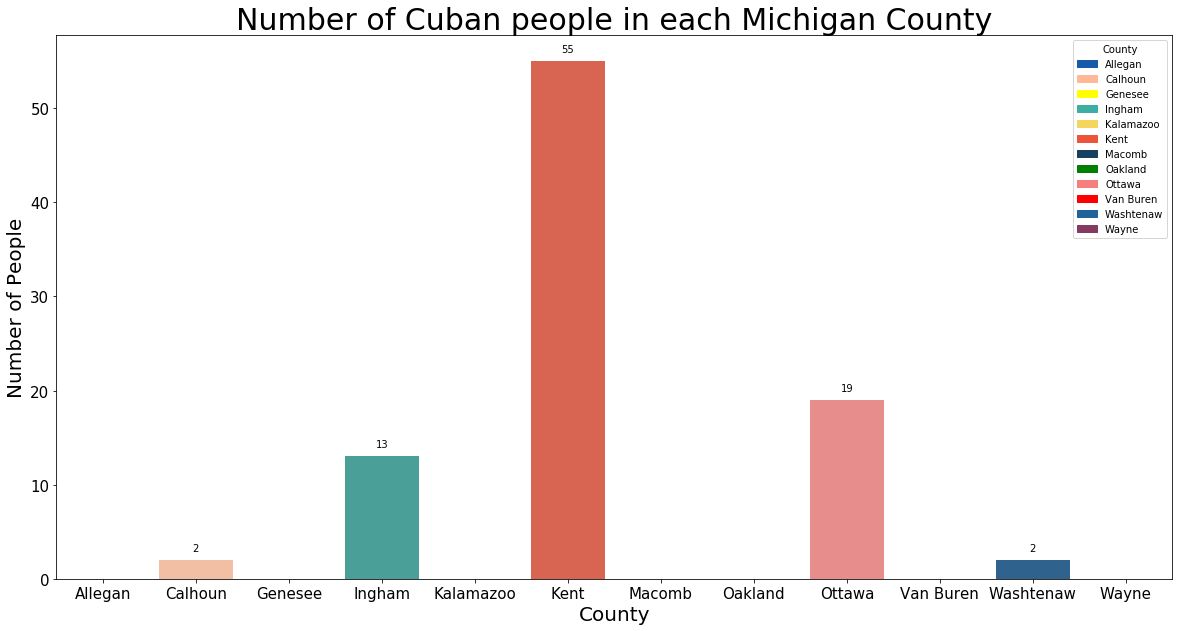

In [79]:
df_cu = df[df['Nationality']=='CU']

fig, axs = plt.subplots()
fig.set_size_inches(20, 10)
graph = sns.countplot(x="Residence County", order=x_labels, data=df_cu, palette=colors)
plt.title('Number of Cuban people in each Michigan County', fontsize=30)
graph.set_xlabel("County",fontsize=20)
graph.set_ylabel("Number of People",fontsize=20)
graph.tick_params(labelsize=15)

# pat = [mpatches.Patch(color=col, label=lab) for col, lab in zip(colors, x_labels)]
axs.legend(title='County', handles=pat, bbox_to_anchor = (1,1), loc='upper right')

for p in graph.patches:
    height = p.get_height()
    graph.text(p.get_x()+p.get_width()/2., height + 1, height.astype('Int32'), ha="center")

/Users/JINGCAO/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: DeprecationWarning: Numeric-style type codes are deprecated and will result in an error in the future.
  from ipykernel import kernelapp as app
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


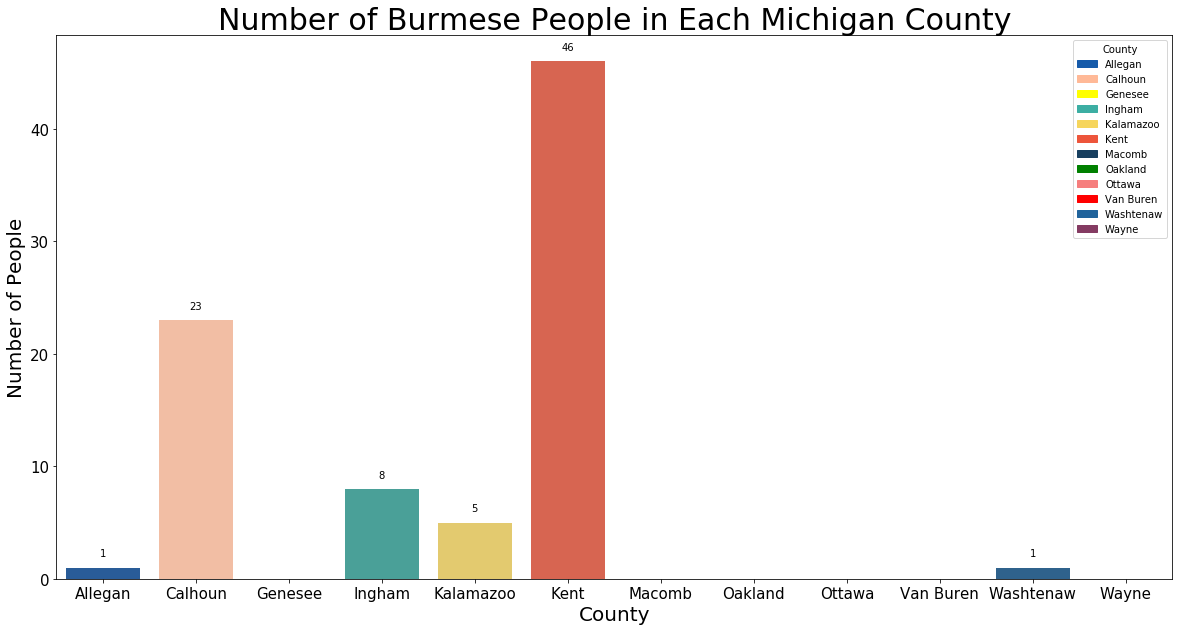

In [80]:
df_bm = df[df['Nationality']=='BM']

fig, axs = plt.subplots()
fig.set_size_inches(20, 10)
graph = sns.countplot(x="Residence County", data=df_bm, order=x_labels, palette=colors)
plt.title('Number of Burmese People in Each Michigan County', fontsize=30)
graph.set_xlabel("County",fontsize=20)
graph.set_ylabel("Number of People",fontsize=20)
graph.tick_params(labelsize=15)

axs.legend(title='County', handles=pat, bbox_to_anchor = (1,1), loc='upper right')

for p in graph.patches:
    height = p.get_height()
    graph.text(p.get_x()+p.get_width()/2., height + 1, height.astype('Int32'),ha="center")

/Users/JINGCAO/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: DeprecationWarning: Numeric-style type codes are deprecated and will result in an error in the future.
  from ipykernel import kernelapp as app
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


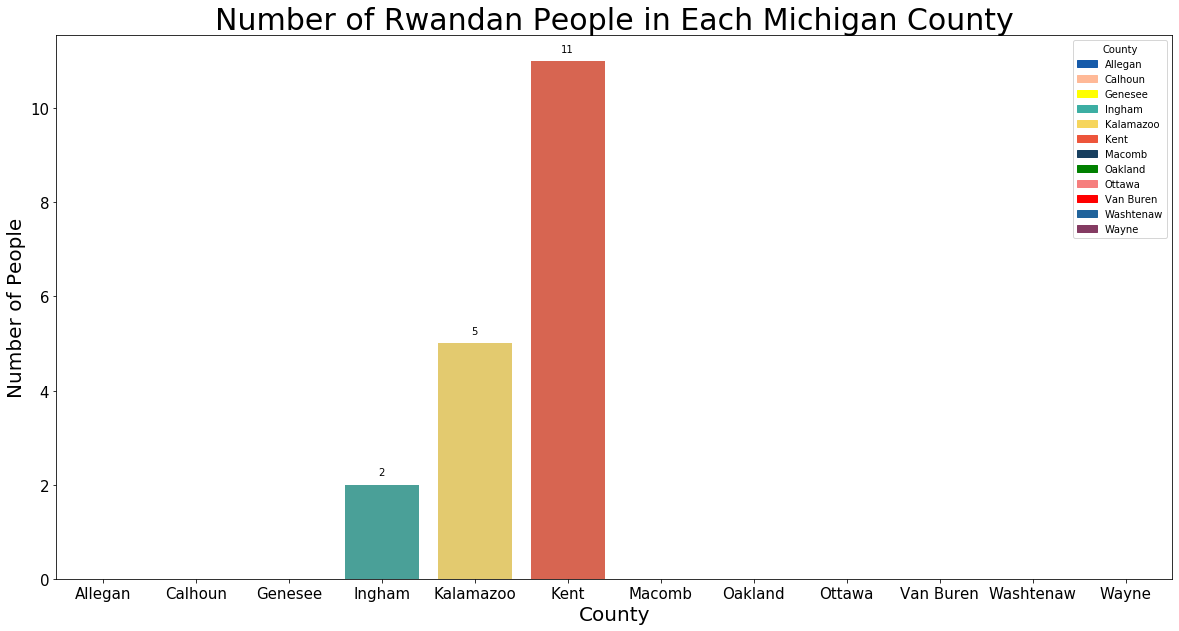

In [81]:
df_rw = df[df['Nationality']=='RW']

fig, axs = plt.subplots()
fig.set_size_inches(20, 10)
graph = sns.countplot(x="Residence County", data=df_rw, order=x_labels, palette=colors)
plt.title('Number of Rwandan People in Each Michigan County', fontsize=30)
graph.set_xlabel("County",fontsize=20)
graph.set_ylabel("Number of People",fontsize=20)
graph.tick_params(labelsize=15)

axs.legend(title='County', handles=pat, bbox_to_anchor = (1,1), loc='upper right')

for p in graph.patches:
    height = p.get_height()
    graph.text(p.get_x()+p.get_width()/2., height + 0.2, height.astype('Int32'),ha="center")

In [82]:
df_rw

,Numbered,Agency Case Number (Optional),Agency Case Status (Optional),Residence County,Enrollment Date,Enrollment End Date,USCIS Status,Secondary Migrant (Migrated In),Migrated Out of State,State Migrated In or Out,Gender,Nationality,Date of Birth,Date of Entry in the U.S.,Match Grant Begin Date,Match Grant End Date,College Degree,Professional Certificate,Field of Study,Time Limited Food Assistance Client,Method of Referral,Received Employment Sevices,New Case,Follow-Up,Referred,0-30 Days,Longer than 1 Month,Longer Than 3 Months,Completed Training,Beginner,Intermediate,Other,Employability Assessment,Transportation,Interpretation & Translation,EAD Assistance,Employment Begin Date,Full Time or Part Time,Cash Assistance Type at Time of Employment,Wage,Medical Benefits Available Employer,Cash Assistance Status after Placement,Second Employment Begin Date,Full Time or Part Time.1,Cash Assistance Type at Time of Employment.1,Wage.1,Medical Benefits from Employer,Cash Assistance Status after Placement.1,Job Upgrade,Total Number of Job Placements in Trimester,Employment Date from a Previous Trimester or Prior to Enrollment,Previous Employment Lasted Until 1/31/2019,Cash on the Last Day of the Current Trimester,Job Placement 90 Day Retention,Were on RCA & Reached 8 Month Time Limit,Age,Time in the U.S.,Date of Entry to Date of Employment,Days in the U.S.,Last Day of the Trimester,Received Employment Sevices.1,New Case.1,Follow-Up.1,Referred.1,0-30 days,Longer than 1 Month.1,Longer than 3 Months,Completed Training.1,Beginner.1,Intermediate.1,Other .1,Employability Assessment.1,Transportation.1,Interpretation & Translation.1,EAD Assistance.1,Employment Begin Date.1,Full Time or Part Time.2,Cash Assistance Type at Time of Employment.2,Wage.2,Medical Benefits Available from Employer,Cash Assistance Status after Placement.2,Second Employment Begin Date.1,Full Time or Part Time.3,Cash Assistance Type at Time of Employment.3,Wage.3,Medical Benefits Available from Employer.1,Cash Assistance Status after Placement.3,Job Upgrade.1,Total Number of Job Placements in Trimester.1,Employment Date from a Previous Trimester or Prior to Enrollment.1,Previous Employment Lasted Until 5/31/2019,Cash on the Last Day of the Current Trimester.1,Job Placement 90 Day Retention.1,Were on RCA & Reached 8 Month Time Limit .1,Age.1,Time in the U.S..1,Date of Entry to Date of Employment.1,Days in the U.S..1,Last Day of the Trimester.1,Received Employment Sevices.2,New Case.2,Follow-Up.2,Referred.2,0-30 days.1,Longer than 1 Month.2,Longer than 3 Months.1,Completed Training.2,Beginner.2,Intermediate.2,Other,Employability Assessment.2,Transportation.2,Interpretation & Translation.2,EAD Assistance.2,Employment Begin Date.2,Full Time or Part Time.4,Cash Assistance Type at Time of Employment.4,Wage.4,Medical Benefits Available from Employer.2,Cash Assistance Status after Placement.4,Second Employment Begin Date.2,Full Time or Part Time.5,Cash Assistance Type at Time of Employment.5,Wage.5,Medical Benefits Available from Employer.3,Cash Assistance Status after Placement.5,Job Upgrade.2,Total Number of Job Placements in Trimester.2,Employment Date from a Previous Trimester or Prior to Enrollment.2,Previous Employment Lasted Until 9/30/2019,Cash on the Last Day of the Current Trimester.2,Job Placement 90 Day Retention.2,Were on RCA & Reached 8 Month Time Limit .2,Age.2,Time in the U.S..2,Date of Entry to Date of Employment.2,Days in the U.S..2,Last Day of the Trimester.2,Agency,Unnamed: 128,Current Employment,Employment,Days from enrollment to first job,Age first job,Age range for first job,Receive Employbility Assessment,Receive Transportation,Receive Interpretation & Translation,Receive EAD Assistance,Days from enrollment to current job,Age current job,Age range for current job
162,0,0,AN,Ingham,2017-06-02 00:00:00,2019-03-28 00:00:00,1,0,0,0,M,RW,1995-03-05 00:00:00,2015-04-23 00:00:00,0,0,0,0,0,0.0,WALK IN,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0,0.00,0.0,0.0,0,0.0,0,0.0,0.

In [83]:
df_rw

,Numbered,Agency Case Number (Optional),Agency Case Status (Optional),Residence County,Enrollment Date,Enrollment End Date,USCIS Status,Secondary Migrant (Migrated In),Migrated Out of State,State Migrated In or Out,Gender,Nationality,Date of Birth,Date of Entry in the U.S.,Match Grant Begin Date,Match Grant End Date,College Degree,Professional Certificate,Field of Study,Time Limited Food Assistance Client,Method of Referral,Received Employment Sevices,New Case,Follow-Up,Referred,0-30 Days,Longer than 1 Month,Longer Than 3 Months,Completed Training,Beginner,Intermediate,Other,Employability Assessment,Transportation,Interpretation & Translation,EAD Assistance,Employment Begin Date,Full Time or Part Time,Cash Assistance Type at Time of Employment,Wage,Medical Benefits Available Employer,Cash Assistance Status after Placement,Second Employment Begin Date,Full Time or Part Time.1,Cash Assistance Type at Time of Employment.1,Wage.1,Medical Benefits from Employer,Cash Assistance Status after Placement.1,Job Upgrade,Total Number of Job Placements in Trimester,Employment Date from a Previous Trimester or Prior to Enrollment,Previous Employment Lasted Until 1/31/2019,Cash on the Last Day of the Current Trimester,Job Placement 90 Day Retention,Were on RCA & Reached 8 Month Time Limit,Age,Time in the U.S.,Date of Entry to Date of Employment,Days in the U.S.,Last Day of the Trimester,Received Employment Sevices.1,New Case.1,Follow-Up.1,Referred.1,0-30 days,Longer than 1 Month.1,Longer than 3 Months,Completed Training.1,Beginner.1,Intermediate.1,Other .1,Employability Assessment.1,Transportation.1,Interpretation & Translation.1,EAD Assistance.1,Employment Begin Date.1,Full Time or Part Time.2,Cash Assistance Type at Time of Employment.2,Wage.2,Medical Benefits Available from Employer,Cash Assistance Status after Placement.2,Second Employment Begin Date.1,Full Time or Part Time.3,Cash Assistance Type at Time of Employment.3,Wage.3,Medical Benefits Available from Employer.1,Cash Assistance Status after Placement.3,Job Upgrade.1,Total Number of Job Placements in Trimester.1,Employment Date from a Previous Trimester or Prior to Enrollment.1,Previous Employment Lasted Until 5/31/2019,Cash on the Last Day of the Current Trimester.1,Job Placement 90 Day Retention.1,Were on RCA & Reached 8 Month Time Limit .1,Age.1,Time in the U.S..1,Date of Entry to Date of Employment.1,Days in the U.S..1,Last Day of the Trimester.1,Received Employment Sevices.2,New Case.2,Follow-Up.2,Referred.2,0-30 days.1,Longer than 1 Month.2,Longer than 3 Months.1,Completed Training.2,Beginner.2,Intermediate.2,Other,Employability Assessment.2,Transportation.2,Interpretation & Translation.2,EAD Assistance.2,Employment Begin Date.2,Full Time or Part Time.4,Cash Assistance Type at Time of Employment.4,Wage.4,Medical Benefits Available from Employer.2,Cash Assistance Status after Placement.4,Second Employment Begin Date.2,Full Time or Part Time.5,Cash Assistance Type at Time of Employment.5,Wage.5,Medical Benefits Available from Employer.3,Cash Assistance Status after Placement.5,Job Upgrade.2,Total Number of Job Placements in Trimester.2,Employment Date from a Previous Trimester or Prior to Enrollment.2,Previous Employment Lasted Until 9/30/2019,Cash on the Last Day of the Current Trimester.2,Job Placement 90 Day Retention.2,Were on RCA & Reached 8 Month Time Limit .2,Age.2,Time in the U.S..2,Date of Entry to Date of Employment.2,Days in the U.S..2,Last Day of the Trimester.2,Agency,Unnamed: 128,Current Employment,Employment,Days from enrollment to first job,Age first job,Age range for first job,Receive Employbility Assessment,Receive Transportation,Receive Interpretation & Translation,Receive EAD Assistance,Days from enrollment to current job,Age current job,Age range for current job
162,0,0,AN,Ingham,2017-06-02 00:00:00,2019-03-28 00:00:00,1,0,0,0,M,RW,1995-03-05 00:00:00,2015-04-23 00:00:00,0,0,0,0,0,0.0,WALK IN,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0,0.00,0.0,0.0,0,0.0,0,0.0,0.

In [84]:
full_or_part_time = []
for index, row in df.iterrows(): 
    if row['Full Time or Part Time'] == 1:
        full_or_part_time.append('Full Time')
    elif row['Full Time or Part Time.1'] == 1:
        full_or_part_time.append('Full Time')
    elif row['Full Time or Part Time.2'] == 1:
        full_or_part_time.append('Full Time')
    elif row['Full Time or Part Time.3'] == 1:
        full_or_part_time.append('Full Time')
    elif row['Full Time or Part Time.4'] == 1:
        full_or_part_time.append('Full Time')
    else:
        full_or_part_time.append('Part Time')

In [85]:
df['Full Time or Part Time'] = full_or_part_time

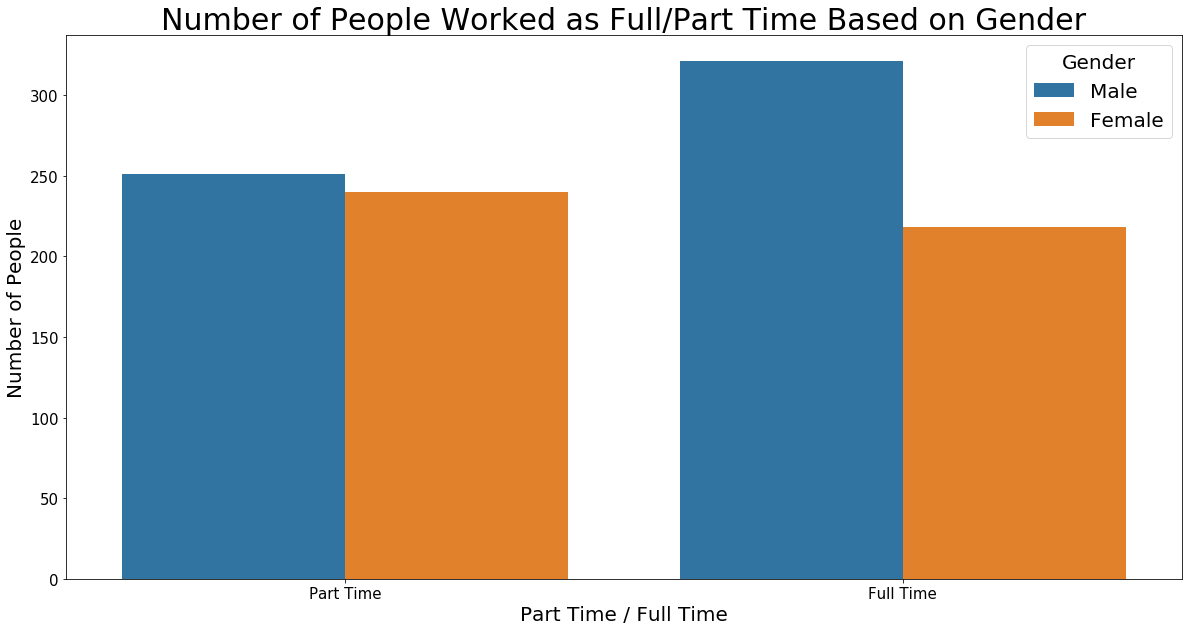

In [86]:
fig, axs = plt.subplots()
fig.set_size_inches(20, 10)
graph = sns.countplot(x="Full Time or Part Time",hue='Gender', data=df)
plt.title('Number of People Worked as Full/Part Time Based on Gender', fontsize=30)
graph.set(ylabel="Number of People")
plt.legend(title='Gender', labels=['Male', 'Female'], title_fontsize = 20, fontsize=20)
graph.set_xlabel("Part Time / Full Time",fontsize=20)
graph.set_ylabel("Number of People",fontsize=20)
graph.tick_params(labelsize=15)

In [87]:
df_degree = df[df['College Degree'] == 1]
df_degree['Nationality'].value_counts()

IZ    15
CU    10
CG     9
RW     3
IR     2
ET     2
SY     1
ES     1
EG     1
AF     1
BY     1
BT     1
Name: Nationality, dtype: int64